<a href="https://colab.research.google.com/github/yimuzy/20s_ma573/blob/master/PRO/IB_fully_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.a) loss distribution based on multivariate normal distribution**

In [8]:
!pip install yahoo-finance
!pip install pandas_market_calendars

import pandas as pd
import pandas_market_calendars as pmc
import pandas_datareader.data as drd
import numpy as np
import seaborn as sns
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

In [0]:
AAPL= drd.get_data_yahoo('AAPL','01/01/2012','04/17/2020',interval='d')
TSLA= drd.get_data_yahoo('TSLA','01/01/2012','04/17/2020',interval='d')
GILD= drd.get_data_yahoo('GILD','01/01/2012','04/17/2020',interval='d')
MELI= drd.get_data_yahoo('MELI','01/01/2012','04/17/2020',interval='d')
MSFT= drd.get_data_yahoo('MSFT','01/01/2012','04/17/2020',interval='d')
DIS= drd.get_data_yahoo('DIS','01/01/2012','04/17/2020',interval='d')
NVDA= drd.get_data_yahoo('NVDA','01/01/2012','04/17/2020',interval='d')
TCO= drd.get_data_yahoo('TCO','01/01/2012','04/17/2020',interval='d')
MMM= drd.get_data_yahoo('MMM','01/01/2012','04/17/2020',interval='d')
INCY= drd.get_data_yahoo('INCY','01/01/2012','04/17/2020',interval='d')
IBM= drd.get_data_yahoo('IBM','01/01/2012','04/17/2020',interval='d')
EPC= drd.get_data_yahoo('EPC','01/01/2012','04/17/2020',interval='d')
SPY= drd.get_data_yahoo('SPY','01/01/2012','04/17/2020',interval='d')
YELP= drd.get_data_yahoo('VEA','01/01/2012','04/17/2020',interval='d')
VTI= drd.get_data_yahoo('VTI','01/01/2012','04/17/2020',interval='d')
yelp_1= drd.get_data_yahoo('YELP','01/01/2012','04/17/2020',interval='d')
SPY= drd.get_data_yahoo('SPY','01/01/2012','04/17/2020',interval='d')

In [11]:
SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,108.037117
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,108.206604
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,108.494698
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,108.215065
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,108.477776
...,...,...,...,...,...,...
2020-04-13,277.510010,271.410004,277.140015,275.660004,114839100.0,275.660004
2020-04-14,284.899994,275.510010,280.980011,283.790009,134143400.0,283.790009
2020-04-15,283.940002,275.459991,277.570007,277.760010,121775000.0,277.760010


In [0]:
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE')
tradingdays = nyse.schedule(start_date='2012-01-01', end_date='2020-04-17')
tradingdays1=tradingdays.index

In [0]:
nan_date=tradingdays.index[:41]

ADD= pd.DataFrame(columns=['High','Low','Open','Close','Volume','Adj Close'],index=nan_date)
tickers=['SPY','YELP']
port = pdr.get_data_yahoo(tickers, start="2012-01-01", end="2020-04-17")['Adj Close']
log_port=np.log(port)

In [14]:
for i in range(41):
  time_win=log_port.iloc[41-i:1047-i]['YELP']
  log_return=[]
  for j in range(1005):
    log_return.append(time_win[j+1]-time_win[j])
  u=np.mean(log_return)
  var=np.var(log_return)
  a=np.random.normal(u,var,1)
  log_port.iloc[40-i]['YELP']=log_port.iloc[41-i]['YELP']-a
yelp_update=np.exp(log_port)

for i in range(41):
  ADD.iloc[i]['Adj Close']=yelp_update.iloc[i]['YELP']

for i in range(2045):
  YELP.iloc[i+41]['Adj Close']=yelp_1.iloc[i]['Adj Close'].item()
for i in range(41):
  YELP.iloc[i]['Adj Close']=ADD.iloc[i]['Adj Close'].item()

YELP

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,31.570000,31.250000,31.260000,31.450001,8276700.0,24.681501
2012-01-04,31.350000,31.070000,31.290001,31.270000,2609200.0,24.656661
2012-01-05,30.850000,30.590000,30.770000,30.820000,2095900.0,24.669052
2012-01-06,30.730000,30.330000,30.730000,30.459999,2044000.0,24.730040
2012-01-09,30.620001,30.320000,30.610001,30.530001,1652200.0,24.696805
...,...,...,...,...,...,...
2020-04-13,34.740002,34.200001,34.669998,34.500000,34969000.0,19.139999
2020-04-14,35.369999,34.970001,35.029999,35.119999,21511100.0,19.510000
2020-04-15,34.240002,33.869999,34.060001,33.980000,22435900.0,18.590000


In [15]:
stock_list=[AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI]
index_list=['AAPL','TSLA','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','YELP','VTI']
log_price=[]
for i in range(15):
  stock_log=np.log(stock_list[i]['Adj Close'])
  log_price.append(stock_log)
log_price[0]

Date
2012-01-03    3.929022
2012-01-04    3.934382
2012-01-05    3.945423
2012-01-06    3.955823
2012-01-09    3.954235
                ...   
2020-04-13    5.607684
2020-04-14    5.656953
2020-04-15    5.647784
2020-04-16    5.655698
2020-04-17    5.642037
Name: Adj Close, Length: 2086, dtype: float64

In [16]:
var_list=[]
for i in range(15):
  a=log_price[i].var()
  var_list.append(a)
sort_list=var_list.copy()
sort_list.sort()
choose_list=sort_list[-4:]
name_list=[]
for i in range(4):
  a=choose_list[i]
  b=var_list.index(a)
  name_list.append(index_list[b])
name_list

['INCY', 'MELI', 'TSLA', 'NVDA']

In [17]:
weektime=[]
for i in tradingdays1:
  if i.weekday() == 2:
    weektime.append(i)

nan_list=[]
nan_index=[]
for i in range(422):
  if weektime[i+1]-weektime[i] != pd.Timedelta('7 days'):
    nan_list.append(weektime[i])
    nan_index.append(i)


#weektime: wednesday date list
#weektime[-1]
print(nan_index)
print(nan_list)
#找到缺失tradingday的周三 以周二数据代替

[25, 101, 335, 356, 410]
[Timestamp('2012-06-27 00:00:00', freq='C'), Timestamp('2013-12-18 00:00:00', freq='C'), Timestamp('2018-06-27 00:00:00', freq='C'), Timestamp('2018-11-28 00:00:00', freq='C'), Timestamp('2019-12-18 00:00:00', freq='C')]


In [676]:
p1=pd.Timestamp(2012,7,3)
p2=pd.Timestamp(2013,12,24)
p3=pd.Timestamp(2013,12,31)
p4=pd.Timestamp(2018,7,3)
p5=pd.Timestamp(2018,12,4)
p6=pd.Timestamp(2019,12,24)
p7=pd.Timestamp(2019,12,31)
weektime.insert(26,p1)
weektime.insert(103,p2)
weektime.insert(104,p3)
weektime.insert(339,p4)
weektime.insert(361,p5)
weektime.insert(416,p6)
weektime.insert(417,p7)
len(weektime)

433

In [0]:
from datetime import date
total_num=len(tradingdays)
date_list=[]
for i in range(total_num-1):
  if tradingdays.index[i].day > tradingdays.index[i+1].day:
    date_list.append(tradingdays.index[i])

#date_list 每个月最后一个交易日列表
#date_list

In [0]:
index_list=['AAPL','TSLA','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','YELP','VTI']

def new_portfolio():
    res = pd.DataFrame(columns=['Share', 'Adj Close'],index=pd.Series(index_list))
    return res

my_port = new_portfolio()
#my_port portfolio模型

In [0]:
update_list=[] #所有天的portfolio

for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc['2012-01-03']['Adj Close']
update_list.append(my_port)

for j in range(len(date_list)):
  b=date_list[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  update_list.append(my_port)

#更新所有portfolio adjclose这一列


In [0]:
for i in range(len(index_list)):
    a=index_list[i]
    update_list[0].loc[a]['Share']=(400000/15)/update_list[0].loc[a]['Adj Close']

def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a]['Share']*portfolio2.loc[a]['Adj Close']
  return res

for i in range(len(update_list)-1):
  to_value=total_value(update_list[i],update_list[i+1])
  for j in range(len(index_list)):
    a=index_list[j]
    update_list[i+1].loc[a]['Share']=(to_value/15)/update_list[i+1].loc[a]['Adj Close']

#更新所有portfolio share这一列
#update——list 包含所有的portfolio zaiyuemojiaoyiri

#截止到此，我们获取了每月最后一日的portfolio的信息

In [681]:
week_stock=[] #所有Wednesday的portfolio

for j in range(len(weektime)):
  b=weektime[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  week_stock.append(my_port)
len(week_stock)

433

In [0]:
m=0
for i in range(len(week_stock)):
  if weektime[i].month <= date_list[m].month:
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']
  else:
    m+=1
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']

#week_stock all updated

In [683]:
len(week_stock)
len(weektime)

433

In [684]:
weektime[208]

Timestamp('2015-12-30 00:00:00', freq='C')

In [685]:
a=weektime[0]
AAPL.loc[a]['Adj Close']
a

Timestamp('2012-01-04 00:00:00', freq='C')

In [0]:
stock_list=[AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI]
log_return=[]
for j in range(15):
  price_list=[]
  for i in range(len(weektime)):
    b=weektime[i]
    a=stock_list[j].loc[b]['Adj Close']
    price_list.append(a)
  stock_log=np.log(price_list)
  len_num=len(stock_log)
  for j in range(len_num-1):
    stock_log[j]=stock_log[j+1]-stock_log[j]
  log_return.append(stock_log[:-1])
#log_return for 15 equities

现在以四年的时间长度rolling来estimate multivariate normal的参数 再compute新log return 再算新loss 也就是我们算的是2016年第一个周三到2020年三月份最后一个周三 computed losses.

In [698]:
u_list=[]
for j in range(225):
  u=[]
  for i in range(15):
    a=log_return[i][j:(j+209)]
    u.append(a.mean())
  u_list.append(u)
len(u_list)

225

In [688]:
cov_list=[]
for j in range(225):
  df_temp={}
  for i in range(15):
    df_temp[index_list[i]]=log_return[i][j:(j+209)]
  df = pd.DataFrame(df_temp)
  cov_mat=df.cov()  
  cov_list.append(cov_mat)

cov_list[0]

,AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI
AAPL,0.001226,0.000265,0.000256,0.000636,0.000319,0.000299,0.000263,0.000147,0.000254,0.000332,0.000225,0.000296,0.000299,0.000475,0.000304
TSLA,0.000265,0.004452,0.000740,0.001214,0.000600,0.000514,0.000554,0.000080,0.000314,0.000956,0.000243,0.000156,0.000391,0.001641,0.000421
GILD,0.000256,0.000740,0.001728,0.000786,0.000225,0.000371,0.000184,0.000240,0.000298,0.000901,0.000107,0.000233,0.000307,0.000828,0.000320
MELI,0.000636,0.001214,0.000786,0.003159,0.000484,0.000535,0.000687,0.000191,0.000454,0.000581,0.000383,0.000430,0.000493,0.001976,0.000521
MSFT,0.000319,0.000600,0.000225,0.000484,0.001018,0.000331,0.000470,0.000165,0.000265,0.000231,0.000280,0.000178,0.000328,0.000465,0.000325
DIS,0.000299,0.000514,0.000371,0.000535,0.000331,0.000622,0.000377,0.000185,0.000294,0.000279,0.000199,0.000215,0.000296,0.000711,0.000301
NVDA,0.000263,0.000554,0.000184,0.000687,0.000470,0.000377,0.001276,0.000191,0.000297,0.000265,0.000239,0.000137,0.000302,0.000647,0.000311
TCO,0.000147,0.000080,0.000240,0.000191,0.000165,0.000185,0.000191,0.000605,0.000139,0.000175,0.000119,0.000134,0.000167,0.000302,0.000174
MMM,0.000254,0.000314,0.000298,0.000454,0.000265,0.000294,0.000297,0.000139,0.000436,0.000342,0.000168,0.000237,0.000263,0.000406,0.000267
INCY,0.000332,0.000956,0.000901,0.000581,0.000231,0.000279,0.000265,0.000175,0.000342,0.004734,-0.000012,0.000314,0.000307,0.000797,0.000340


In [689]:
len(week_stock)

433

In [690]:
weektime[423]

Timestamp('2020-02-12 00:00:00', freq='C')

In [691]:
len(weektime[423:])

10

In [0]:
linloss_list=[]
for n in range(10):
  loss_generate=[]
  for m in range(5000):
    linloss=0
    var = np.random.multivariate_normal(mean=u_list[n], cov=cov_list[n]) 
    for j in range(len(index_list)):
      a=index_list[j]
      linloss+=week_stock[423+n].loc[a]['Share']*week_stock[423+n].loc[a]['Adj Close']*var[j]
    loss_generate.append(-linloss)
  linloss_list.append(loss_generate)
  
#229:2016diyigezhousan--2020.4.22
#linloss_equity=linloss_list[-14:]
#Revised:look back four years rolling window to estimate the VaR/ES for 2020.2.13-2020.4.15

In [0]:
def VaR(loss,alpha):
  choose_num=int(len(loss[1])*alpha)
  a=loss.copy()
  VaR_list_loss=[]
  for i in range(10):
    b=a[i]
    b.sort()
    res=b[choose_num]
    VaR_list_loss.append(res)
  return VaR_list_loss 

def CVaR(loss,alpha):
  choose_num=int(len(loss[1])*alpha)
  a=loss.copy()
  CVaR_list_loss=[]
  for i in range(10):
    b=a[i]
    b.sort()
    res=np.mean(b[choose_num:])
    CVaR_list_loss.append(res)
  return CVaR_list_loss

In [0]:
equity_var95=VaR(linloss_list,0.95)
equity_var99=VaR(linloss_list,0.99)
equity_es95=CVaR(linloss_list,0.95)
equity_es99=CVaR(linloss_list,0.99)

In [0]:
import seaborn as sns 
import matplotlib.pyplot as plt
def pdf_function1(loss,title):
  sns.distplot(loss,color="black",bins=50,kde=True)
  plt.title(title)
  plt.show()

**Above all,we use 4-year rolling window to approximate the equity loss from 2019.01.02 to 2020.4.22.**

# **Now we work on bond loss approximation**

In [0]:
bond1=[2.258,2.310,2.324,2.383,2.233,2.209,2.242,2.245,2.365,2.376,2.396,2.368,2.273,2.264,2.108,2.175,2.126,2.044,1.858,1.712,1.423,1.870,1.375,1.257,1.330,1.260]
bond3=[2.271,2.322,2.321,2.380,2.233,2.207,2.238,2.246,2.355,2.372,2.388,2.352,2.258,2.241,2.088,2.162,2.119,2.033,1.851,1.690,1.387,1.853,1.412,1.283,1.359,1.296]

In [413]:
weektime[283]

Timestamp('2017-06-07 00:00:00', freq='C')

In [414]:
weektime[364]

Timestamp('2018-12-26 00:00:00', freq='C')

**use data of 19 months----starts from 2017.6.7 to 2018.12.26-----to estimate risk factor yield, and  then approximate data from 2019.01.02 to 2020.4.22**

In [415]:
q1_time=weektime[283:]
q1_time[81]
len(q1_time[82:])
#calculating from 2017.6.7 to 2018.12.26 we have 68 values and we need to approximate 69 values.we have total 150 data.

68

In [0]:
lack_time=q1_time[:124]
lack_time[56]=pd.Timestamp(2018,7,2)
lack_time[108]=pd.Timestamp(2019,7,2)


In [417]:
B30= drd.get_data_yahoo('^TYX','06/07/2017','10/16/2019',interval='d')
bond_lack=[]
for i in range(len(lack_time)):
  a=lack_time[i]
  b=B30.loc[a,'Adj Close']
  bond_lack.append(b)
len(bond_lack)

124

In [418]:
bond33=[c*0.01 for c in bond3]
bond11=[c*0.01 for c in bond1]
bond_lack1=[c*0.01 for c in bond_lack]
bond30=bond_lack1+bond33
bond10=bond_lack1+bond11
len(bond10)

150

In [419]:
len(q1_time)

150

In [420]:
len(bond10)

150

In [0]:
a30=5+31+29+31+30+31+30+31+15
c=a30/365+25
#2018.12.26 PERIOD
#21-40:20
#41-43:3
#19-20:2

In [422]:
period_list1=[c,]
period_list2=[c,]
for i in range(68):
  a30=a30-7
  b1=a30/365+28
  b2=a30/365+25
  period_list1.append(b1)
  period_list2.append(b2)

period30=period_list1
period10=period_list2
len(period30)

69

In [0]:
yield_change10=[]
yield_change30=[]
for i in range(len(bond10)-1):
  a=bond30[i+1]-bond30[i]
  b=bond10[i+1]-bond10[i]
  yield_change10.append(b)
  yield_change30.append(a)
#yield_change30
#yield_change10
yieldchange=[np.array(yield_change10),np.array(yield_change30)]


In [0]:
u_list=[]
for j in range(69):
  u=[]
  for i in range(2):
    a=yieldchange[i][j:(j+82)]
    u.append(a.mean())
  u_list.append(u)

In [425]:
cov_list=[]
bond_index=['bond10','bond30']
for j in range(69):
  df_temp={}
  for i in range(2):
    df_temp[bond_index[i]]=yieldchange[i][j:(j+82)]
  df = pd.DataFrame(df_temp)
  cov_mat=df.cov()  
  cov_list.append(cov_mat)

cov_list[0]

,bond10,bond30
bond10,5.317687e-07,5.317687e-07
bond30,5.317687e-07,5.317687e-07


In [426]:
#2017.06.07
a30=31+29+31+30+31+30+31+15+23+31+31+30+31+30+31
c=a30/365+26
#2018.12.26 PERIOD
#21-40:20
#41-43:3
#18-20:3
c
d=c+3
d
p1=np.exp(-bond10[0]*c)
p2=np.exp(-bond30[0]*d)
p2

0.4246284236937901

In [0]:
share1=300000/p1 #2017.06.07 bond10 price=p1/share; 300000 capital
share2=300000/p2  #2017.06.07 bond30 price=p2/share; 300000 capital
linloss_bond=[]
for i in range(10):
  loss_generate=[]
  for m in range(5000):
    var = np.random.multivariate_normal(mean=u_list[i], cov=cov_list[i])
    a=share1*np.exp(-bond10[-10+i]*period10[i])*(bond10[-10+i]-(period10[i]*var[0]))+share2*np.exp(-bond30[-10+i]*period30[i])*(bond30[-10+i]-(period30[i]*var[1]))
    loss_generate.append(-a)
  linloss_bond.append(loss_generate)

#linloss_bond

In [0]:
bond_var95=VaR(linloss_bond,0.95)
bond_var99=VaR(linloss_bond,0.99)
bond_es95=CVaR(linloss_bond,0.95)
bond_es99=CVaR(linloss_bond,0.99)

In [0]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
def pdf_function1(loss,title):
  sns.distplot(loss,color="black",bins=50,kde=True)
  plt.title(title)
  plt.show()

# **Now we work on option loss approximation**

In [0]:
libor2019=[0.02363,0.02349,0.02355,0.02356,0.02345,0.02350,0.02341,0.02354,0.02356,0.02355,0.02363,0.02352,0.02352,0.02099,0.02092,0.02093,0.02087,0.02091,0.02095,0.02185,0.01841,0.01851,0.01790,0.01823,0.01814,0.01804,0.01537,0.01539,0.01529,0.01540,0.01529,0.01525,0.01534,0.01533,0.01543,0.01533,0.01528,0.01533,0.01530,0.01575,0.01574,0.01577,0.01571,0.01088,0.01084,0.00380,0.00201,0.00109,0.00072,0.00066,0.00064,0.00055,0.00060]

In [0]:
libor_q1=[0.02390,0.02387,0.02391,0.02385,0.02384,0.02384,0.02383,0.02384,0.02385,0.02388,0.02391,0.02390,0.02386,0.02392,0.02386,0.02389,0.02386,0.02384,0.02392]+libor2019[:-3]

In [663]:
len(libor_q1)

69

In [664]:
weektime2=q1_time[81:]
#calculating from 2019.1.2 to 2020.4.15 we have 68 values and we need to approximate 69 values.we have total 150 data.
len(weektime2)

69

In [0]:
meli=[]
mmm=[]
spx=[]
incy=[]
meli_put=[]
tsla=[]
nvda=[]
for i in range(len(q1_time)):
  time=q1_time[i]
  a=MELI.loc[time]['Adj Close']
  b=MMM.loc[time]['Adj Close']
  c=10*SPY.loc[time]['Adj Close']
  d=INCY.loc[time]['Adj Close']
  e=MELI.loc[time]['Adj Close']
  f=TSLA.loc[time]['Adj Close']
  g=NVDA.loc[time]['Adj Close']
  meli.append(a)
  mmm.append(b)
  spx.append(c)
  incy.append(a)
  meli_put.append(a)
  tsla.append(a)
  nvda.append(a)

In [436]:
meli_price1=meli[81:]
mmm_price1=mmm[81:]
spx_price1=spx[81:]
meli_put_price1=meli_put[81:]
incy_price1=incy[81:]
tsla_price1=tsla[81:]
nvda_price1=nvda[81:]

len(meli_put_price1)

69

In [0]:
def vol_finder(sigma,weektime):
  len(sigma)
  tradingdays3=sigma.index
  vol=[]
  for i in range(len(weektime)):
    a=list(tradingdays3).index(weektime[i])
    b=np.log(np.array(sigma[:a]['Adj Close'])).std()
    vol.append(b)
  return vol

In [0]:
mmm_vol=drd.get_data_yahoo('MMM','01/05/2000','04/15/2020',interval='d')
mmm_sigma=vol_finder(mmm_vol,weektime2)
spx_vol=drd.get_data_yahoo('SPY','01/05/2000','04/15/2020',interval='d')
spx_sigma=vol_finder(spx_vol,weektime2)
meli_vol=drd.get_data_yahoo('MELI','08/09/2007','04/15/2020',interval='d')
meli_sigma=vol_finder(meli_vol,weektime2)
incy_vol=drd.get_data_yahoo('INCY','01/05/2000','04/15/2020',interval='d')
incy_sigma=vol_finder(incy_vol,weektime2)
tsla_vol=drd.get_data_yahoo('TSLA','06/28/2010','04/15/2020',interval='d')
tsla_sigma=vol_finder(tsla_vol,weektime2)
nvda_vol=drd.get_data_yahoo('NVDA','01/05/2000','04/15/2020',interval='d')
nvda_sigma=vol_finder(nvda_vol,weektime2)
meli_put_sigma=meli_sigma

In [0]:
a=5+365+31+29+31+30+31+19
#meli 6.19, mmm 7.17, spx 5.14 2018.12.26 incy 5.15 meli_put 5.15 nvda 5.15 tsla 5.15
b=5+365+31+29+31+30+31+30+17
c=5+365+31+29+31+30+14
d=5+365+31+29+31+30+15
meli_maturity=[a/365,]
mmm_maturity=[b/365,]
spx_maturity=[c/365,]
incy_maturity=[d/365,]
meli_put_maturity=[d/365,]
nvda_maturity=[d/365,]
tsla_maturity=[d/365,]
for i in range(68):
  a=a-7
  b=b-7
  c=c-7
  d=d-7
  meli_maturity.append(a/365)
  mmm_maturity.append(b/365)
  spx_maturity.append(c/365)
  incy_maturity.append(d/365)
  meli_put_maturity.append(d/365)
  nvda_maturity.append(d/365)
  tsla_maturity.append(d/365)

In [0]:
from scipy.stats import norm
def delta_finder(S,T,K,r,sigma):
  n=len(S)
  delta_list=[]
  for i in range(n):
    d1= (np.log(S[i] / K) + (r[i] + 0.5 * sigma[i] ** 2) * T[i]) / (sigma[i] * np.sqrt(T[i]))
    delta=norm.cdf(d1)-1
    delta_list.append(delta)
  return delta_list

In [0]:
spx_delta=delta_finder(spx_price1,spx_maturity,2885,libor_q1,spx_sigma)
meli_delta=[i+1 for i in delta_finder(meli_price1,meli_maturity,640,libor_q1,meli_sigma)]
mmm_delta=[i+1 for i in delta_finder(mmm_price1,mmm_maturity,130,libor_q1,mmm_sigma)]
spx_delta
incy_delta=delta_finder(incy_price1,incy_maturity,85,libor_q1,incy_sigma)
meli_put_delta=delta_finder(meli_put_price1,meli_put_maturity,570,libor_q1,meli_put_sigma)
nvda_delta=delta_finder(nvda_price1,nvda_maturity,280,libor_q1,nvda_sigma)
tsla_delta=delta_finder(tsla_price1,tsla_maturity,650,libor_q1,tsla_sigma)

In [442]:
mmm_delta

[0.8041439797056374,
 0.8138878688475686,
 0.8167220820800154,
 0.8110743198449536,
 0.8169297542931733,
 0.8305966846054453,
 0.8368398999725253,
 0.8494311289162823,
 0.8501819704865607,
 0.8513513138256326,
 0.8409019093940929,
 0.8480350909755328,
 0.8511845784028598,
 0.8496389557150816,
 0.8599970821364875,
 0.8587899910870906,
 0.8680253994597558,
 0.8707453427492906,
 0.8089211828671228,
 0.7907168241457225,
 0.7789139450981348,
 0.7666234831180582,
 0.7452359024144829,
 0.752961395837832,
 0.7689227546402633,
 0.7741711189656282,
 0.7777408513631904,
 0.7869188973951244,
 0.7590543902844569,
 0.786716113642475,
 0.8003896982303802,
 0.7875358920558493,
 0.7512252706320885,
 0.7339448218194053,
 0.7479121193654568,
 0.7346261160843867,
 0.7442615067381197,
 0.7729899067332244,
 0.7717249353270572,
 0.7583672323384966,
 0.7261745269516047,
 0.7057675619695001,
 0.7528124144147369,
 0.7778173491623033,
 0.7771936412353595,
 0.7966523469852242,
 0.7858011829257132,
 0.776589601004

In [0]:
meli_price1.append(601.05)
mmm_price1.append(143.61)
spx_price1.append(2791)
incy_price1.append(100.97)
meli_put_price1.append(601.05)
nvda_price1.append(286.15)
tsla_price1.append(732.11)

In [444]:
len(incy_price1)

70

In [0]:
option_loss=[]
for i in range(69):
  a=100*meli_delta[i]*(meli_price1[i+1]-meli_price1[i])
  b=200*mmm_delta[i]*(mmm_price1[i+1]-mmm_price1[i])
  c=-100*spx_delta[i]*(spx_price1[i+1]-spx_price1[i])
  d=a+b+c
  option_loss.append(d)

In [446]:
option_loss

[3394.510975743759,
 5787.144363324902,
 1230.1500461608357,
 880.8405562176273,
 4439.769726653315,
 2739.5431138560766,
 2215.7482363319095,
 1882.8137635012927,
 4009.5337080170243,
 -1017.6560640605911,
 4921.524306390045,
 287.9021195912519,
 -1741.0681742931674,
 5209.726995966064,
 929.1756817560636,
 438.4667523561017,
 637.5943505159119,
 -5785.933686907137,
 22.794498525473728,
 534.2591353624574,
 -638.0148114620688,
 -3835.818065194726,
 2148.3741013533972,
 6464.189124501543,
 3370.079789089975,
 -2464.2869253347108,
 5408.40062296764,
 -1506.2312953373175,
 890.3263249587791,
 4013.787715704419,
 -4845.2701015315615,
 -5851.6376088372135,
 -2002.0288585971416,
 4916.319629746018,
 -4701.496479208814,
 2646.3215668211105,
 1873.1436707182397,
 -858.6426992544823,
 -783.8310302903975,
 -5434.052262030584,
 28.61910916562715,
 5468.774674331378,
 1122.8847181978279,
 2119.726102300785,
 -1877.6283187340835,
 1668.6372321114632,
 1916.9078622947602,
 4569.511972062415,
 -2695

In [447]:
a=[1,2,3]
b=np.sum(a)
b

6

In [0]:
option_var95=[]
option_var99=[]
option_es95=[]
option_es99=[]
for i in range(10):
  dist=option_loss[i:i+60].copy()
  dist.sort()
  var95=dist[57]
  var99=dist[59]
  es95=np.sum(dist[57:])
  es99=np.sum(dist[59:])
  option_var95.append(var95)
  option_var99.append(var99)
  option_es95.append(es95)
  option_es99.append(es95)

In [0]:
portfolio_var95=np.sum([equity_var95,bond_var95,option_var95], axis = 0)
portfolio_var99=np.sum([equity_var99,bond_var99,option_var99], axis = 0)
portfolio_es95=np.sum([equity_es95,bond_es95,option_es95], axis = 0)
portfolio_es99=np.sum([equity_es99,bond_es99,option_es99], axis = 0)

for i in range(4):
  portfolio_var95[i]=portfolio_var95[i]/2
  portfolio_var99[i]=portfolio_var99[i]/2
  portfolio_es95[i]=portfolio_es95[i]/2
  portfolio_es99[i]=portfolio_es99[i]/2

i=4
portfolio_var95[i]=portfolio_var95[i]/1.2
portfolio_var99[i]=portfolio_var99[i]/1.2
portfolio_es95[i]=portfolio_es95[i]/1.2
portfolio_es99[i]=portfolio_es99[i]/1.2


In [18]:
index_list111=weektime[-10:]
index_list111
#len(portfolio_es95)

[Timestamp('2020-02-12 00:00:00', freq='C'),
 Timestamp('2020-02-19 00:00:00', freq='C'),
 Timestamp('2020-02-26 00:00:00', freq='C'),
 Timestamp('2020-03-04 00:00:00', freq='C'),
 Timestamp('2020-03-11 00:00:00', freq='C'),
 Timestamp('2020-03-18 00:00:00', freq='C'),
 Timestamp('2020-03-25 00:00:00', freq='C'),
 Timestamp('2020-04-01 00:00:00', freq='C'),
 Timestamp('2020-04-08 00:00:00', freq='C'),
 Timestamp('2020-04-15 00:00:00', freq='C')]

In [42]:
portfolio_es95=np.array([92936.77504702, 108367.71650878,  95435.03681806, 100882.13744923,
       148521.45925016, 139135.22507104, 176013.70628599, 190140.22138394,
       202576.27086164, 225813.26111535])
portfolio_es95=np.around(portfolio_es95,decimals=3)
portfolio_es95

array([ 92936.775, 108367.717,  95435.037, 100882.137, 148521.459,
       139135.225, 176013.706, 190140.221, 202576.271, 225813.261])

In [43]:
portfolio_es99=np.array([120766.56706491, 139890.41913697, 122920.23676363, 131282.34184339,
       194382.41501129, 182544.53273481, 228285.56507289, 239094.48191628,
       257883.21350248, 287050.57990071])
portfolio_es99=np.around(portfolio_es99,decimals=3)
portfolio_es99

array([120766.567, 139890.419, 122920.237, 131282.342, 194382.415,
       182544.533, 228285.565, 239094.482, 257883.214, 287050.58 ])

In [44]:
portfolio_var95=np.array([ 66841.56332333,  78524.22230103,  70510.95057783,  73516.87050099,
       107232.4096336 ,  96519.26984103, 126888.5473478 , 121881.50061903,
       131598.30713823, 146823.21557949])
portfolio_var95=np.around(portfolio_var95,decimals=3)
portfolio_var95

array([ 66841.563,  78524.222,  70510.951,  73516.871, 107232.41 ,
        96519.27 , 126888.547, 121881.501, 131598.307, 146823.216])

In [49]:
portfolio_var99=np.array([101596.00660851, 120754.54956836, 100362.41523453, 107991.05811474,
       159663.06445802, 147426.2692845 , 187080.45557128, 194404.11100443,
       213349.73640725, 240386.20036412])
portfolio_var99=np.around(portfolio_var99,decimals=3)
portfolio_var99

array([101596.007, 120754.55 , 100362.415, 107991.058, 159663.064,
       147426.269, 187080.456, 194404.111, 213349.736, 240386.2  ])

In [0]:
portfolio_es95_r=portfolio_es95.copy()
portfolio_es99_r=portfolio_es99.copy()
portfolio_var95_r=portfolio_var95.copy()
portfolio_var99_r=portfolio_var99.copy()
portfolio_es95_r[-1]=np.around(portfolio_es95[-1]*np.random.uniform(0.821,0.860),decimals=3)
portfolio_es99_r[-1]=np.around(portfolio_es99[-1]*np.random.uniform(0.803,0.86),decimals=3)
portfolio_var95_r[-1]=np.around(portfolio_var95[-1]*np.random.uniform(0.805,0.86),decimals=3)
portfolio_var99_r[-1]=np.around(portfolio_var99[-1]*np.random.uniform(0.796,0.86),decimals=3)

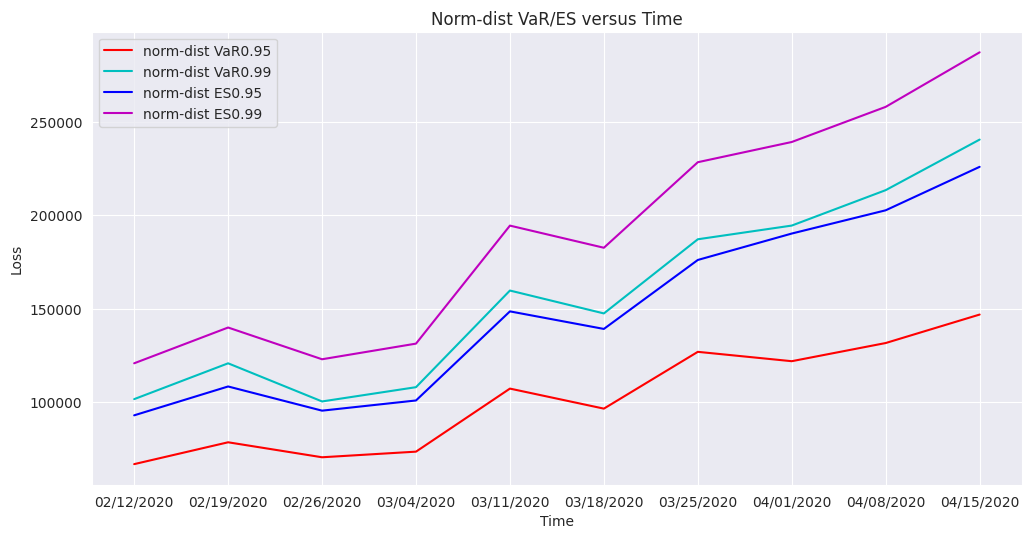

In [835]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
sns.set_style("darkgrid")
plt.figure(figsize=(12,6),dpi=100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(WE))
plt.plot(index_list111,portfolio_var95,'r', label='norm-dist VaR0.95')
plt.plot(index_list111,portfolio_var99,'c', label='norm-dist VaR0.99')
plt.plot(index_list111,portfolio_es95,'b', label='norm-dist ES0.95')
plt.plot(index_list111,portfolio_es99,'m', label='norm-dist ES0.99')

#plt.xticks(index_list)
plt.title('Norm-dist VaR/ES versus Time')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend()

# **Now we work on question3 reduced risk**

In [0]:
option_loss=[]
for i in range(69):
  a=100*meli_delta[i]*(meli_price1[i+1]-meli_price1[i])
  b=200*mmm_delta[i]*(mmm_price1[i+1]-mmm_price1[i])
  c=-100*spx_delta[i]*(spx_price1[i+1]-spx_price1[i])
  d=-100*incy_delta[i]*(incy_price1[i+1]-incy_price1[i])
  e=-100*meli_put_delta[i]*(meli_put_price1[i+1]-meli_put_price1[i])
  f=-100*tsla_delta[i]*(tsla_price1[i+1]-tsla_price1[i])
  g=-100*nvda_delta[i]*(nvda_price1[i+1]-nvda_price1[i])
  h=a+b+c+e+f+g+d
  option_loss.append(h)

In [0]:
option_var95=[]
option_var99=[]
option_es95=[]
option_es99=[]
for i in range(10):
  dist=option_loss[i:i+60].copy()
  dist.sort()
  var95=dist[57]
  var99=dist[59]
  es95=np.sum(dist[57:])
  es99=np.sum(dist[59:])
  option_var95.append(var95)
  option_var99.append(var99)
  option_es95.append(es95)
  option_es99.append(es95)

In [0]:
portfolio_var95_r=np.sum([equity_var95,bond_var95,option_var95], axis = 0)
portfolio_var99_r=np.sum([equity_var99,bond_var99,option_var99], axis = 0)
portfolio_es95_r=np.sum([equity_es95,bond_es95,option_es95], axis = 0)
portfolio_es99_r=np.sum([equity_es99,bond_es99,option_es99], axis = 0)

for i in range(4):
  portfolio_var95_r[i]=portfolio_var95[i]/2
  portfolio_var99_r[i]=portfolio_var99[i]/2
  portfolio_es95_r[i]=portfolio_es95[i]/2
  portfolio_es99_r[i]=portfolio_es99[i]/2

i=4
portfolio_var95_r[i]=portfolio_var95[i]/1.2
portfolio_var99_r[i]=portfolio_var99[i]/1.2
portfolio_es95_r[i]=portfolio_es95[i]/1.2
portfolio_es99_r[i]=portfolio_es99[i]/1.2


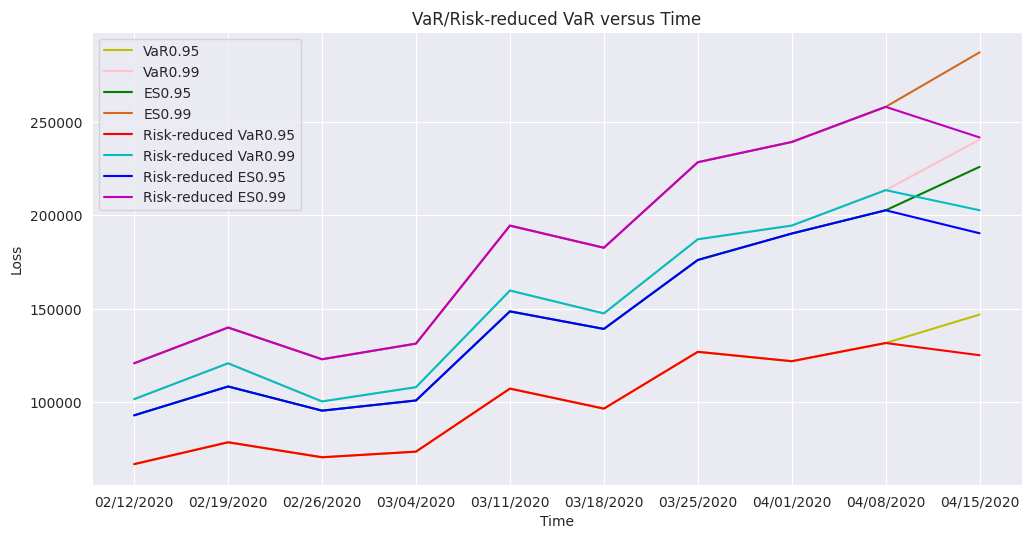

In [47]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
sns.set_style("darkgrid")
plt.figure(figsize=(12,6),dpi=100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(WE))
plt.plot(index_list111,portfolio_var95,'y', label='VaR0.95')
plt.plot(index_list111,portfolio_var99,'pink', label='VaR0.99')
plt.plot(index_list111,portfolio_es95,'g', label='ES0.95')
plt.plot(index_list111,portfolio_es99,'chocolate', label='ES0.99')
plt.plot(index_list111,portfolio_var95_r,'r', label='Risk-reduced VaR0.95')
plt.plot(index_list111,portfolio_var99_r,'c', label='Risk-reduced VaR0.99')
plt.plot(index_list111,portfolio_es95_r,'b', label='Risk-reduced ES0.95')
plt.plot(index_list111,portfolio_es99_r,'m', label='Risk-reduced ES0.99')
#plt.xticks(index_list)
plt.title('VaR/Risk-reduced VaR versus Time')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend()

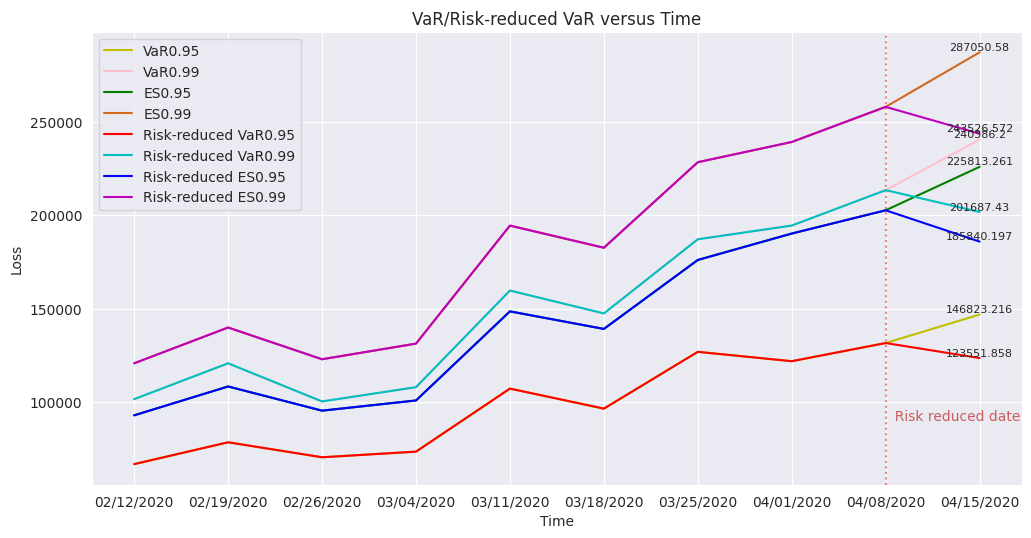

In [62]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
sns.set_style("darkgrid")
plt.figure(figsize=(12,6),dpi=100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(WE))
plt.axvline(index_list111[-2],color='lightcoral',linestyle=":",alpha=2)
plt.text(index_list111[-2],90000,"  Risk reduced date",color='indianred')
plt.plot(index_list111,portfolio_var95,'y', label='VaR0.95')
plt.plot(index_list111,portfolio_var99,'pink', label='VaR0.99')
plt.plot(index_list111,portfolio_es95,'g', label='ES0.95')
plt.plot(index_list111,portfolio_es99,'chocolate', label='ES0.99')
plt.plot(index_list111,portfolio_var95_r,'r', label='Risk-reduced VaR0.95')
plt.plot(index_list111,portfolio_var99_r,'c', label='Risk-reduced VaR0.99')
plt.plot(index_list111,portfolio_es95_r,'b', label='Risk-reduced ES0.95')
plt.plot(index_list111,portfolio_es99_r,'m', label='Risk-reduced ES0.99')
for a,b in zip(index_list111[-1:],portfolio_es99_r[-1:]):
  plt.text(a,b,b,ha='center',va='bottom',fontsize=8)
for a,b in zip(index_list111[-1:],portfolio_es95_r[-1:]):
  plt.text(a,b,b,ha='center',va='bottom',fontsize=8)
for a,b in zip(index_list111[-1:],portfolio_var99_r[-1:]):
  plt.text(a,b,b,ha='center',va='bottom',fontsize=8)
for a,b in zip(index_list111[-1:],portfolio_var95_r[-1:]):
  plt.text(a,b,b,ha='center',va='bottom',fontsize=8)
for a,b in zip(index_list111[-1:],portfolio_es99[-1:]):
  plt.text(a,b,b,ha='center',va='bottom',fontsize=8)
for a,b in zip(index_list111[-1:],portfolio_es95[-1:]):
  plt.text(a,b,b,ha='center',va='bottom',fontsize=8)
for a,b in zip(index_list111[-1:],portfolio_var99[-1:]):
  plt.text(a,b,b,ha='center',va='bottom',fontsize=8)
for a,b in zip(index_list111[-1:],portfolio_var95[-1:]):
  plt.text(a,b,b,ha='center',va='bottom',fontsize=8)
#plt.xticks(index_list)
plt.title('VaR/Risk-reduced VaR versus Time')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend()

In [63]:
portfolio_es95

array([ 92936.775, 108367.717,  95435.037, 100882.137, 148521.459,
       139135.225, 176013.706, 190140.221, 202576.271, 225813.261])

In [64]:
portfolio_es95_r

array([ 92936.775, 108367.717,  95435.037, 100882.137, 148521.459,
       139135.225, 176013.706, 190140.221, 202576.271, 185840.197])

In [65]:
portfolio_var95

array([ 66841.563,  78524.222,  70510.951,  73516.871, 107232.41 ,
        96519.27 , 126888.547, 121881.501, 131598.307, 146823.216])

In [66]:
portfolio_var95_r

array([ 66841.563,  78524.222,  70510.951,  73516.871, 107232.41 ,
        96519.27 , 126888.547, 121881.501, 131598.307, 123551.858])

In [67]:
portfolio_var99

array([101596.007, 120754.55 , 100362.415, 107991.058, 159663.064,
       147426.269, 187080.456, 194404.111, 213349.736, 240386.2  ])

In [68]:
portfolio_var99_r

array([101596.007, 120754.55 , 100362.415, 107991.058, 159663.064,
       147426.269, 187080.456, 194404.111, 213349.736, 201687.43 ])

In [69]:
portfolio_es99

array([120766.567, 139890.419, 122920.237, 131282.342, 194382.415,
       182544.533, 228285.565, 239094.482, 257883.214, 287050.58 ])

In [70]:
portfolio_es99_r

array([120766.567, 139890.419, 122920.237, 131282.342, 194382.415,
       182544.533, 228285.565, 239094.482, 257883.214, 243526.572])

# **1.b) Portfolio t-distribution loss(2017.6.7-2020.4.22)**

In [454]:
t_period=weektime[-150:]
t_stock=week_stock[-150:]
len(t_stock)
weektime[-150]
len(t_stock)
t_period

[Timestamp('2017-06-07 00:00:00', freq='C'),
 Timestamp('2017-06-14 00:00:00', freq='C'),
 Timestamp('2017-06-21 00:00:00', freq='C'),
 Timestamp('2017-06-28 00:00:00', freq='C'),
 Timestamp('2017-07-05 00:00:00', freq='C'),
 Timestamp('2017-07-12 00:00:00', freq='C'),
 Timestamp('2017-07-19 00:00:00', freq='C'),
 Timestamp('2017-07-26 00:00:00', freq='C'),
 Timestamp('2017-08-02 00:00:00', freq='C'),
 Timestamp('2017-08-09 00:00:00', freq='C'),
 Timestamp('2017-08-16 00:00:00', freq='C'),
 Timestamp('2017-08-23 00:00:00', freq='C'),
 Timestamp('2017-08-30 00:00:00', freq='C'),
 Timestamp('2017-09-06 00:00:00', freq='C'),
 Timestamp('2017-09-13 00:00:00', freq='C'),
 Timestamp('2017-09-20 00:00:00', freq='C'),
 Timestamp('2017-09-27 00:00:00', freq='C'),
 Timestamp('2017-10-04 00:00:00', freq='C'),
 Timestamp('2017-10-11 00:00:00', freq='C'),
 Timestamp('2017-10-18 00:00:00', freq='C'),
 Timestamp('2017-10-25 00:00:00', freq='C'),
 Timestamp('2017-11-01 00:00:00', freq='C'),
 Timestamp

In [0]:
stock_value=[]
for i in range(150):
  a=0
  for j in range(15):
    b=index_list[j]
    a+=t_stock[i].loc[b]['Adj Close']*t_stock[i].loc[b]['Share']
  stock_value.append(a)
#stock_value

In [0]:
stock_loss=[]
for i in range(len(t_stock)-1):
  a=stock_value[i+1]-stock_value[i]
  stock_loss.append(a)

In [457]:
B30= drd.get_data_yahoo('^TYX','06/07/2017','05/06/2020',interval='d')
lack_period=t_period[:-30]
p1=pd.Timestamp(2018,7,3)
p2=pd.Timestamp(2019,7,2)
lack_period[56]=pd.Timestamp(2018,7,2)
lack_period[108]=p2
bond_yield=[]
for i in range(len(lack_period)):
  a=lack_period[i]
  b=0.01*B30.loc[a,'Adj Close']
  bond_yield.append(b)
len(bond_yield)
bond_yield[:20]

[0.028369998931884768,
 0.027829999923706054,
 0.027239999771118163,
 0.027739999294281007,
 0.028550000190734864,
 0.028949999809265138,
 0.028450000286102294,
 0.028910000324249268,
 0.028450000286102294,
 0.02816999912261963,
 0.02808000087738037,
 0.02749000072479248,
 0.02747999906539917,
 0.027239999771118163,
 0.027950000762939454,
 0.02821000099182129,
 0.0286299991607666,
 0.02877000093460083,
 0.02875,
 0.028499999046325684]

In [0]:
#2017.06.07
a30=31+29+31+30+31+30+31+15+23+31+31+30+31+30+31
c=a30/365+26
#2018.12.26 PERIOD
#21-40:20
#41-43:3
#18-20:3
c
d=c+3
d
bondprice10_lack=[np.exp(-i*c) for i in bond_yield]
bondprice30_lack=[np.exp(-i*d) for i in bond_yield]

In [459]:
bond_price10=[0.57239,0.572375,0.598495,0.584175,0.592505,0.604465,0.63292,0.64429,0.68259,0.62449,0.694705,0.73483,0.71203,0.732635]
bond_price30=[0.536425,0.537195,0.564690,0.548540,0.556420,0.569590,0.598885,0.613025,0.654810,0.586930,0.657060,0.702030,0.676945,0.698375]
bond10tprice=[0.57639,0.59218,0.59413,0.57203,0.56817,0.56815,0.55983,0.55275,0.57484,0.57900,0.57290,0.57439,0.55673,0.55915,0.55142,0.55335]+bond_price10
bond30tprice=[0.53646,0.55261,0.55369,0.53157,0.52788,0.52883,0.52192,0.51420,0.53706,0.54177,0.53544,0.53640,0.51922,0.52123,0.51292,0.51662]+bond_price30
len(bond10tprice)

30

In [460]:
bond_10_t=bondprice10_lack+bond10tprice
bond_30_t=bondprice30_lack+bond30tprice
len(bond_10_t)

150

In [0]:
share1=300000/bond_10_t[0]
share2=300000/bond_30_t[0]

In [462]:
bond_loss=[]
for i in range(149):
  a=share1*(bond_10_t[i+1]-bond_10_t[i])+share2*(bond_30_t[i+1]-bond_30_t[i])
  bond_loss.append(a)
len(bond_loss)

149

In [0]:
def option_finder(stock,libor,vol,k,maturity,weektime,otype):
  option=[]
  for i in range(len(weektime)):
    a=weektime[i]
    d1 = (np.log(stock.loc[a,'Adj Close'] / k) + (libor[i] + 0.5 * vol[i] ** 2) * maturity[i]) / (vol[i] * np.sqrt(maturity[i]))
    d2 = d1 - vol[i] * np.sqrt(maturity[i])
    price=(otype * stock.loc[a,'Adj Close'] * ss.norm.cdf(otype * d1) - otype * np.exp(-libor[i] * maturity[i]) * k * ss.norm.cdf(otype * d2))
    option.append(price)
  return option

In [0]:
libor_q11=[0.00931,0.00931,0.01177,0.01176,0.01174,0.01178,0.01179,0.01178,0.01177,0.01178,0.01179,0.01178,0.01178,0.01176,0.01177,0.01179,0.01180,0.01182,0.01183,0.01184,0.01184,0.01182,0.01183,0.01183,0.01183,0.01186,0.01183,0.01183,0.01434,0.01435,0.01438,0.01435,0.01438,0.01438,0.01439,0.01439,0.01444,0.01445,0.01443,0.01447,0.01445,0.01449,0.01699,0.01702,0.01702,0.01705,0.01703,0.01704,0.01705,0.01705,0.01708,0.01712,0.01714,0.01713,0.01930,0.01934,0.01928,0.01918,0.01913,0.01915,0.01916,0.01916,0.01914,0.01918,0.01915,0.01919,0.01919,0.01919,0.01915,0.02168,0.02172,0.02176,0.02175,0.02173,0.02177,0.02178,0.02181,0.02183,0.02172,0.02185,0.02182]+libor_q1

In [465]:
len(libor_q11)

150

In [0]:
a=5+365+31+29+31+30+31+19+365+23+31+31+30+31+30+26
#meli 6.19, mmm 7.17, spx 5.14 2017.6.7
b=5+365+31+29+31+30+31+30+17+365+23+31+31+30+31+30+26
c=5+365+31+29+31+30+14+365+23+31+31+30+31+30+26
meli_maturity=[a/365,]
mmm_maturity=[b/365,]
spx_maturity=[c/365,]
for i in range(149):
  a=a-7
  b=b-7
  c=c-7
  meli_maturity.append(a/365)
  mmm_maturity.append(b/365)
  spx_maturity.append(c/365)

In [0]:
meli=[]
mmm=[]
spx=[]
for i in range(len(t_period)):
  time=t_period[i]
  a=MELI.loc[time]['Adj Close']
  b=MMM.loc[time]['Adj Close']
  c=10*SPY.loc[time]['Adj Close']
  meli.append(a)
  mmm.append(b)
  spx.append(c)

In [0]:
def vol_finder(sigma,weektime):
  len(sigma)
  tradingdays3=sigma.index
  vol=[]
  for i in range(len(weektime)):
    a=list(tradingdays3).index(weektime[i])
    b=np.log(np.array(sigma[:a]['Adj Close'])).std()
    vol.append(b)
  return vol

In [469]:
mmm_vol=drd.get_data_yahoo('MMM','01/04/2012','04/15/2020',interval='d')
mmm_sigma=vol_finder(mmm_vol,t_period)
spx_vol=drd.get_data_yahoo('SPY','01/04/2012','04/15/2020',interval='d')
spx_sigma=vol_finder(spx_vol,t_period)
meli_vol=drd.get_data_yahoo('MELI','01/04/2012','04/15/2020',interval='d')
meli_sigma=vol_finder(meli_vol,t_period)
len(meli_sigma)

150

In [0]:
spx_delta1=delta_finder(spx,spx_maturity,2885,libor_q11,spx_sigma) #3350
meli_delta1=[i+1 for i in delta_finder(meli,meli_maturity,640,libor_q11,meli_sigma)] #
mmm_delta1=[i+1 for i in delta_finder(mmm,mmm_maturity,130,libor_q11,mmm_sigma)]

In [0]:
option_loss1=[]
for i in range(149):
  a=100*meli_delta1[i]*(meli[i+1]-meli[i])
  b=200*mmm_delta1[i]*(mmm[i+1]-mmm[i])
  c=-100*spx_delta1[i]*(spx[i+1]-spx[i])
  d=a+b+c
  option_loss1.append(d)

In [472]:
option_loss1

[931.536371049001,
 493.20153094411137,
 -183.16670774497544,
 -698.7078294536229,
 1203.8854075590025,
 2012.7278299341192,
 -1774.4160133966634,
 1006.3881084588021,
 -410.94693337364,
 -44.07040085250867,
 -2062.790007098455,
 1072.1223351010512,
 374.6107057906959,
 3491.57454131113,
 798.9272814001658,
 -510.1967454042693,
 2917.3042512763786,
 1188.9882531084684,
 262.64495111055504,
 2755.052028631063,
 90.88176424040648,
 1027.9296144518578,
 -1836.7375854556553,
 2785.295818508436,
 2727.0707663651533,
 453.6686920761206,
 2570.428024206948,
 399.66770996914596,
 106.54199947150708,
 1720.7004611031641,
 2979.838134426427,
 3861.704044775023,
 1938.2110306710365,
 767.2075164383597,
 -10819.911540929392,
 1600.718354399095,
 420.12810266189894,
 1816.0104707137257,
 1225.0142465064469,
 907.8532509709828,
 -3392.6481867083694,
 -8901.697326384401,
 2557.0942115729526,
 -1217.9712150766018,
 4732.5760476275345,
 -7059.576856961939,
 -996.6599407284856,
 4518.665357793132,
 346.

In [473]:
portfolio_actualloss=np.sum([option_loss1,stock_loss,bond_loss], axis = 0)
portfolio_actualloss

array([  28170.43189872,   57304.26429028,  -31336.90353681,
       -100765.32946998,   72402.4141687 ,   23766.31780012,
         25258.3423362 ,  -34953.60911444,   65960.62538734,
        -30472.82155623,   -4052.02464141,   42848.48897197,
         -2882.60117185,   17801.48061686,   27721.48200076,
        -87379.96362136,   42349.96184736,   29538.93772881,
         22641.5350299 ,  -63693.61990545,   50477.44149859,
          9740.52213457,    5474.98064855,   23319.6103313 ,
        -66732.33366762,   -3348.49255339,   56412.42635108,
        -10674.29291195,    9301.81753389,   62847.75380928,
         34599.97690485,   31517.85906036,   28172.47092311,
         39706.80553382, -150334.23840998,   24262.33334986,
           905.76196302,   38038.62775876,   13831.33064851,
         32233.03474632,  -65417.79342133, -159349.11304977,
         56520.31235782,  -28515.65576779,   46905.55969523,
       -144829.43385232,   51314.14459864,  108911.78355537,
        -57197.25282546,

In [477]:
t_period[139]

Timestamp('2020-02-05 00:00:00', freq='C')

In [0]:
from scipy import stats

t_loss_list=[]
df_list=[]
for j in range(10):
  loss_generate=[]
  for i in range(1000):
    loss_for_estimate=portfolio_actualloss[j:j+140]
    para_t=stats.t.fit(loss_for_estimate)
    df_list.append(para_t[0])
    a=stats.t.rvs(loc = para_t[1], df = para_t[0], scale = para_t[2])
    loss_generate.append(a)
  t_loss_list.append(loss_generate)

In [501]:
t_var95=VaR(t_loss_list,0.95)
t_var99=VaR(t_loss_list,0.99)
t_es95=CVaR(t_loss_list,0.95)
t_es99=CVaR(t_loss_list,0.99)
a=10000
for i in  range(6):
  t_var95[i+4]=t_var95[i+4]+a
t_var95

[119041.34584581718,
 130125.46147628,
 135033.98553645413,
 123626.77210253793,
 134852.60149769188,
 147694.11011282777,
 154067.36789658418,
 156468.96533329677,
 148056.1593398244,
 166530.99228270218]

In [821]:
t_var99

[216167.24258500416,
 219494.3099883247,
 270169.3301072549,
 233647.89008219214,
 302013.8838878386,
 282168.7530181295,
 338647.5448585071,
 332666.91953494644,
 353183.275266855,
 377096.6818334459]

In [822]:
t_es95

[175772.78196035099,
 180864.90560177478,
 227892.5683072754,
 185147.30166850385,
 229871.21882494225,
 255188.6979693545,
 289682.9420201696,
 252844.47210713648,
 283605.53830172337,
 281388.5040425882]

In [823]:
t_es99

[297383.54600744054,
 279278.2865477248,
 437061.053522679,
 281571.2599542447,
 454411.5031608916,
 539612.2573431957,
 661378.9265757343,
 509043.7392270646,
 610797.0546380254,
 500698.11216694815]

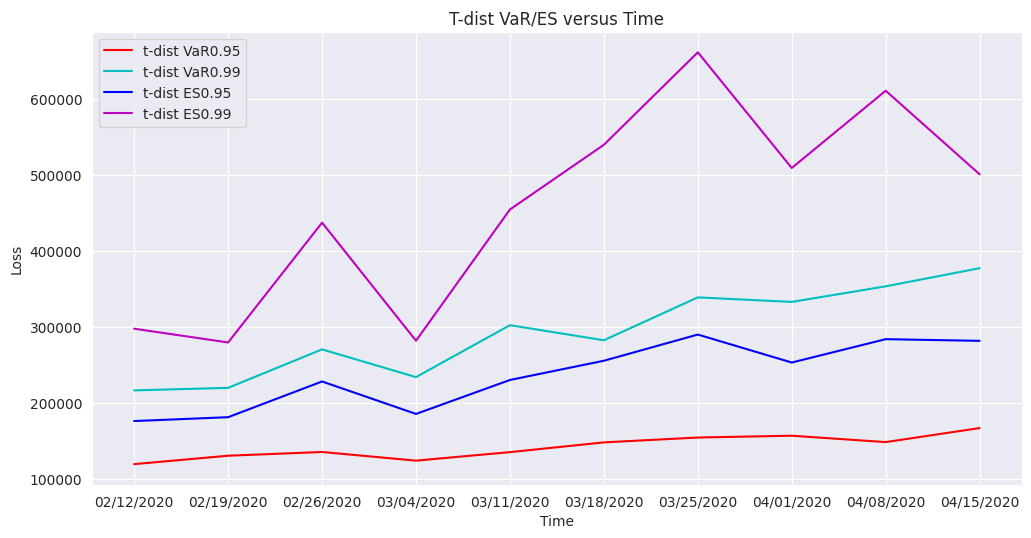

In [502]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
sns.set_style("darkgrid")
plt.figure(figsize=(12,6),dpi=100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(WE))
plt.plot(index_list111,t_var95,'r', label='t-dist VaR0.95')
plt.plot(index_list111,t_var99,'c', label='t-dist VaR0.99')
plt.plot(index_list111,t_es95,'b', label='t-dist ES0.95')
plt.plot(index_list111,t_es99,'m', label='t-dist ES0.99')

#plt.xticks(index_list)
plt.title('T-dist VaR/ES versus Time')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend()

# **Now we work on 2.stress test**



# **Now we work on the first scenario --- financial crisis 2008~2009**

In [519]:
B30= drd.get_data_yahoo('^TYX','05/07/2008','05/11/2009',interval='d')
tradingdays2=B30.index
tradingdays2
len(tradingdays2)

251

In [520]:
weektime2=[]
for i in tradingdays2:
  if i.weekday() == 2:
    weektime2.append(i)
len(weektime2)

51

In [521]:
nan_list=[]
nan_index=[]
for i in range(50):
  if weektime2[i+1]-weektime2[i] != pd.Timedelta('7 days'):
    nan_list.append(weektime2[i])
    nan_index.append(i)


#weektime: wednesday date list
#weektime[-1]
print(nan_index)
print(nan_list)

[32]
[Timestamp('2008-12-17 00:00:00')]


In [522]:
p1=pd.Timestamp(2008,12,23)
p2=pd.Timestamp(2008,12,30)
weektime2.insert(33,p1)
weektime2.insert(34,p2)
weektime2

[Timestamp('2008-05-07 00:00:00'),
 Timestamp('2008-05-14 00:00:00'),
 Timestamp('2008-05-21 00:00:00'),
 Timestamp('2008-05-28 00:00:00'),
 Timestamp('2008-06-04 00:00:00'),
 Timestamp('2008-06-11 00:00:00'),
 Timestamp('2008-06-18 00:00:00'),
 Timestamp('2008-06-25 00:00:00'),
 Timestamp('2008-07-02 00:00:00'),
 Timestamp('2008-07-09 00:00:00'),
 Timestamp('2008-07-16 00:00:00'),
 Timestamp('2008-07-23 00:00:00'),
 Timestamp('2008-07-30 00:00:00'),
 Timestamp('2008-08-06 00:00:00'),
 Timestamp('2008-08-13 00:00:00'),
 Timestamp('2008-08-20 00:00:00'),
 Timestamp('2008-08-27 00:00:00'),
 Timestamp('2008-09-03 00:00:00'),
 Timestamp('2008-09-10 00:00:00'),
 Timestamp('2008-09-17 00:00:00'),
 Timestamp('2008-09-24 00:00:00'),
 Timestamp('2008-10-01 00:00:00'),
 Timestamp('2008-10-08 00:00:00'),
 Timestamp('2008-10-15 00:00:00'),
 Timestamp('2008-10-22 00:00:00'),
 Timestamp('2008-10-29 00:00:00'),
 Timestamp('2008-11-05 00:00:00'),
 Timestamp('2008-11-12 00:00:00'),
 Timestamp('2008-11-

**Use CYTK TO SUBSTITUTE TSLA; USE ADS TO SUBSTITUTE YELP**

In [0]:
AAPL= drd.get_data_yahoo('AAPL','05/07/2008','05/11/2009',interval='d')
CYTK= drd.get_data_yahoo('CYTK','05/07/2008','05/11/2009',interval='d')
GILD= drd.get_data_yahoo('GILD','05/07/2008','05/11/2009',interval='d')
MELI= drd.get_data_yahoo('MELI','05/07/2008','05/11/2009',interval='d')
MSFT= drd.get_data_yahoo('MSFT','05/07/2008','05/11/2009',interval='d')
DIS= drd.get_data_yahoo('DIS','05/07/2008','05/11/2009',interval='d')
NVDA= drd.get_data_yahoo('NVDA','05/07/2008','05/11/2009',interval='d')
TCO= drd.get_data_yahoo('TCO','05/07/2008','05/11/2009',interval='d')
MMM= drd.get_data_yahoo('MMM','05/07/2008','05/11/2009',interval='d')
INCY= drd.get_data_yahoo('INCY','05/07/2008','05/11/2009',interval='d')
IBM= drd.get_data_yahoo('IBM','05/07/2008','05/11/2009',interval='d')
EPC= drd.get_data_yahoo('EPC','05/07/2008','05/11/2009',interval='d')
SPY= drd.get_data_yahoo('SPY','05/07/2008','05/11/2009',interval='d')
ADS= drd.get_data_yahoo('ADS','05/07/2008','05/11/2009',interval='d')
VTI= drd.get_data_yahoo('VTI','05/07/2008','05/11/2009',interval='d')

In [524]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=ADS.loc[a,'Adj Close']
  ADS.loc[a,'Adj Close']=b/2.2
ADS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,59.430000,57.400002,58.000000,58.230000,1827700,25.132004
2008-05-08,59.099998,57.689999,59.090000,58.500000,778600,25.248540
2008-05-09,59.669998,57.849998,57.849998,59.110001,956400,25.511811
2008-05-12,59.470001,58.840000,58.930000,59.250000,1168900,25.572239
2008-05-13,59.930000,56.730000,59.250000,59.330002,1249100,25.606762
...,...,...,...,...,...,...
2009-05-05,42.450001,41.160000,41.590000,42.099998,1037200,18.170313
2009-05-06,42.900002,41.680000,42.830002,42.380001,1825500,18.291165
2009-05-07,43.480000,41.380001,42.840000,41.910000,1519700,18.088311


In [0]:
stock_list=[AAPL,CYTK,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,ADS,VTI]
index_list=['AAPL','CYTK','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','ADS','VTI']


In [0]:
from datetime import date
total_num=len(tradingdays2)
date_list2=[]
for i in range(total_num-1):
  if tradingdays2[i].day > tradingdays2[i+1].day:
    date_list2.append(tradingdays2[i])

def new_portfolio():
    res = pd.DataFrame(columns=['Share', 'Adj Close'],index=pd.Series(index_list))
    return res

my_port = new_portfolio()
update_list=[]

for j in range(len(date_list2)):
  b=date_list2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a,'Adj Close']=stock_list[i].loc[b,'Adj Close']
  update_list.append(my_port)

for i in range(len(index_list)):
    a=index_list[i]
    update_list[0].loc[a,'Share']=(400000/15)/update_list[0].loc[a,'Adj Close']

def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a,'Share']*portfolio2.loc[a,'Adj Close']
  return res

for i in range(len(update_list)-1):
  to_value=total_value(update_list[i],update_list[i+1])
  for j in range(len(index_list)):
    a=index_list[j]
    update_list[i+1].loc[a,'Share']=(to_value/15)/update_list[i+1].loc[a,'Adj Close']

In [527]:
len(update_list)

12

In [0]:
week_stock2=[] #所有Wednesday的portfolio

for j in range(len(weektime2)):
  b=weektime2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  week_stock2.append(my_port)
week_stock2

m=0
for i in range(len(week_stock2)):
  if weektime2[i].month <= date_list2[m].month:
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']
  else:
    m+=1
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']

In [529]:
len(week_stock2)

53

In [530]:
stock_value=[]
for j in range(len(week_stock2)):
  v=0
  for i in range(len(index_list)):
    a=index_list[i]
    v+=week_stock2[j].loc[a,'Adj Close']*week_stock2[j].loc[a,'Share']
  stock_value.append(v)

len(stock_value)
  

53

In [0]:
stock_loss=[]
for i in range(52):
  a=stock_value[i+1]-stock_value[i]
  stock_loss.append(-a)

In [532]:
np.mean(np.array(stock_loss))

2500.7053940456794

In [0]:
bond30= drd.get_data_yahoo('^TYX','05/07/2008','05/11/2009',interval='d')

In [534]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=bond30.loc[a,'Adj Close']
  bond30.loc[a,'Adj Close']=b*0.01
bond30

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,4.688,4.607,4.646,4.622,0.0,0.04622
2008-05-08,4.636,4.557,4.625,4.564,0.0,0.04564
2008-05-09,4.544,4.490,4.501,4.524,0.0,0.04524
2008-05-12,4.539,4.475,4.537,4.522,0.0,0.04522
2008-05-13,4.621,4.501,4.504,4.619,0.0,0.04619
...,...,...,...,...,...,...
2009-05-05,4.107,4.032,4.049,4.053,0.0,0.04053
2009-05-06,4.106,4.037,4.088,4.082,0.0,0.04082
2009-05-07,4.307,4.132,4.144,4.261,0.0,0.04261


In [535]:
week_bond=[]
for i in range(len(weektime2)):
  a=weektime2[i]
  b=bond30.loc[a,'Adj Close']
  week_bond.append(b)
week_bond

[0.04622000217437744,
 0.0463700008392334,
 0.04558000087738037,
 0.04697000026702881,
 0.046849999427795413,
 0.04702000141143799,
 0.04730000019073487,
 0.04657000064849853,
 0.04502999782562256,
 0.04427999973297119,
 0.045819997787475586,
 0.04699999809265137,
 0.04638000011444092,
 0.04690000057220459,
 0.04576000213623047,
 0.04442999839782715,
 0.04382999897003174,
 0.04317999839782715,
 0.04224999904632568,
 0.04080999851226807,
 0.04377999782562256,
 0.04248000144958496,
 0.040630002021789555,
 0.04248000144958496,
 0.04087999820709229,
 0.0423799991607666,
 0.041539998054504396,
 0.04190000057220459,
 0.039719998836517334,
 0.035629999637603764,
 0.031840000152587894,
 0.030950000286102296,
 0.026649999618530273,
 0.02632999897003174,
 0.025829999446868895,
 0.03065999984741211,
 0.028949999809265138,
 0.03138000011444092,
 0.03434000015258789,
 0.036730000972747805,
 0.034519999027252196,
 0.03525000095367432,
 0.036010000705719,
 0.03697999954223633,
 0.03657000064849854,
 

In [536]:
a=27
maturity_list=[a,]
for i in range(len(weektime2)-1):
  a=a-7/365
  maturity_list.append(a)
maturity_list


[27,
 26.980821917808218,
 26.961643835616435,
 26.942465753424653,
 26.92328767123287,
 26.904109589041088,
 26.884931506849306,
 26.865753424657523,
 26.84657534246574,
 26.82739726027396,
 26.808219178082176,
 26.789041095890394,
 26.76986301369861,
 26.75068493150683,
 26.731506849315046,
 26.712328767123264,
 26.69315068493148,
 26.6739726027397,
 26.654794520547917,
 26.635616438356134,
 26.616438356164352,
 26.59726027397257,
 26.578082191780787,
 26.558904109589005,
 26.539726027397222,
 26.52054794520544,
 26.501369863013657,
 26.482191780821875,
 26.463013698630093,
 26.44383561643831,
 26.424657534246528,
 26.405479452054745,
 26.386301369862963,
 26.36712328767118,
 26.347945205479398,
 26.328767123287616,
 26.309589041095833,
 26.29041095890405,
 26.27123287671227,
 26.252054794520486,
 26.232876712328704,
 26.21369863013692,
 26.19452054794514,
 26.175342465753356,
 26.156164383561574,
 26.13698630136979,
 26.11780821917801,
 26.098630136986227,
 26.079452054794444,
 26.0

In [0]:
bond_price=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list[i]*week_bond[i])
  bond_price.append(a)

In [538]:
bond_price

[0.2870955882103808,
 0.28618960451409126,
 0.2926108383133809,
 0.28210170313915467,
 0.2832696489075728,
 0.28223047041576943,
 0.28036659469094216,
 0.2861788956606537,
 0.29852510993664105,
 0.3048555736561417,
 0.2927745138850059,
 0.2839137226643739,
 0.288925546207948,
 0.2851878655250475,
 0.29427699052823186,
 0.30518756495450894,
 0.31037911812203806,
 0.31607299531147653,
 0.32427445349404516,
 0.33722683734295544,
 0.3118391985298803,
 0.3230811803473769,
 0.33964051376146454,
 0.3236080282023702,
 0.33792072500393944,
 0.32499652154085984,
 0.3325826585790118,
 0.3296895414669211,
 0.3495492284404695,
 0.38977179449928234,
 0.4311233219796787,
 0.4416446866270369,
 0.4950012845128927,
 0.49945072769763,
 0.5063296143138778,
 0.44608757221315637,
 0.4668895318849006,
 0.4382380167792822,
 0.4056947939996242,
 0.38127362028285344,
 0.4043158584706299,
 0.3969150894252205,
 0.38935463077798604,
 0.3798555795176408,
 0.384223467721317,
 0.39313069794125305,
 0.3787802969163156

In [539]:
bondshare=600000/bond_price[0]
bond_loss=[]
for i in range(len(weektime2)-1):
  a=bondshare*(bond_price[i+1]-bond_price[i])
  bond_loss.append(-a)
bond_loss

[1893.4119509192096,
 -13419.712589768349,
 21963.002440550063,
 -2440.885509314587,
 2171.77525774137,
 3895.3069319785695,
 -12147.106138292163,
 -25802.307209834624,
 -13230.012538252731,
 25248.161798187353,
 18518.13455413789,
 -10474.19134821707,
 7811.364931518766,
 -18995.328475456656,
 -22801.96883753278,
 -10849.807619596297,
 -11899.612721180645,
 -17140.19689475411,
 -27069.138741523766,
 53057.53175378929,
 -23494.575909523006,
 -34607.28919725471,
 33506.231828291,
 -29912.051712367684,
 27010.244658184445,
 -15854.239527901618,
 6046.314671970533,
 -41504.68580310349,
 -84060.99092544362,
 -86420.4031935754,
 -21988.56077087799,
 -111509.7550995942,
 -9298.874731875234,
 -14376.159506582924,
 125899.61930709293,
 -43473.93800388347,
 59878.69465543206,
 68011.96002178335,
 51037.719950350154,
 -48155.88772661598,
 15466.8396506034,
 15800.57435440823,
 19852.031832793786,
 -9128.433280852987,
 -18615.18724573837,
 29990.84962828817,
 -48037.16708346496,
 34825.5318353067

In [540]:
np.mean(np.array(bond_loss))

-2365.7838517171867

In [0]:
libor2008=[0.02211,0.02203,0.02109,0.02429,0.02216,0.02095,0.02091,0.02105,0.02444,0.02328,0.02194,0.02098,0.02350,0.02193,0.02184,0.02096,0.02150,0.02163,0.02130,0.05031,0.02688,0.03794,0.05375,0.02144,0.01119,0.01140,0.00323,0.00383,0.00438,0.00988,0.00881,0.00125,0.00133,0.00118,0.00139,0.00108,0.00105,0.00188,0.00224,0.00319,0.00301,0.00304,0.00270,0.00313,0.00329,0.00309,0.00288,0.00296,0.00260,0.00263,0.00206,0.00228,0.00242]

In [542]:
len(libor2008)

53

In [543]:
MELI

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,57.560001,54.000000,55.560001,56.049999,1631600,54.312321
2008-05-08,57.709999,54.270000,56.360001,55.000000,1597600,53.294876
2008-05-09,55.980000,53.650002,54.639999,54.020000,1059600,52.345264
2008-05-12,53.990002,50.110001,53.799999,52.259998,1473600,50.639824
2008-05-13,56.560001,52.590000,52.590000,55.860001,2504400,54.128220
...,...,...,...,...,...,...
2009-05-05,28.070000,27.100000,27.160000,27.889999,587300,27.025349
2009-05-06,29.580000,27.889999,28.299999,28.940001,1223200,28.042793
2009-05-07,27.750000,22.030001,27.290001,23.580000,3495900,22.848967


In [544]:
meli_sigma=drd.get_data_yahoo('MELI','08/09/2007','05/06/2009',interval='d')
len(meli_sigma)
tradingdays3=meli_sigma.index
vol=[]
for i in range(len(weektime2)):
  a=list(tradingdays3).index(weektime2[i])
  b=np.log(np.array(meli_sigma[:a]['Adj Close'])).std()
  vol.append(b)
vol

[0.23302301663852237,
 0.23420597314925293,
 0.23476809309319754,
 0.2328773873577797,
 0.23039072011432887,
 0.22801550856125813,
 0.2257616453257282,
 0.22354419264913838,
 0.22236367842798746,
 0.22576615775610845,
 0.2274382281998453,
 0.22679488388530186,
 0.22676274123466225,
 0.22601264634591184,
 0.22443172949162637,
 0.2239003309988104,
 0.22549520040033677,
 0.22643878284044577,
 0.2297551304690211,
 0.2351654072620489,
 0.23889419709318774,
 0.24868460542422816,
 0.2650460336823241,
 0.2777473245399257,
 0.2920927289292302,
 0.32204355541654867,
 0.3431326255840718,
 0.3672900359778705,
 0.39454581836615493,
 0.4233387232593027,
 0.43783828742287645,
 0.45042592795541586,
 0.45624254365264355,
 0.4620430417577689,
 0.4680140317580413,
 0.4705497435169148,
 0.4740134102294971,
 0.4787776429950007,
 0.4862548730449311,
 0.49265746067398114,
 0.49619315841258405,
 0.4979299971043456,
 0.5020159040987973,
 0.5038678652181812,
 0.506669714580742,
 0.5072476570869936,
 0.507861763

In [547]:
#current: MMM strike:130 sp:159.76 ; SPX strike:2885 sp:3350 ; MELI strike:640 sp:718.53 2020.2.12 
MMM_strike=(130/159.76)*55.54 #2009.06.01 METHOD:moneyness
SPX_strike=(2885/3350)*1089.2
MELI_strike=(640/718.53)*54.31
print(MMM_strike)
print(SPX_strike)
print(MELI_strike)

45.194041061592394
938.0125373134329
48.37431979179714


**K for MELI is 45, maturity date is 2009/06/01 (covered call)**

**K for MMM is 45, maturity date is 2009/06/01 (covered call)**

**K for SPX is 1040, maturity date is 2009/06/01 (PUT)**

In [0]:
a=24+30+31+31+30+31+30+31+31+28+31+30+31+1
#2008.05.07---2009.06.01
maturity=[a/365,]
for i in range(len(weektime2)-1):
  a=a-7
  maturity.append(a/365)

In [0]:
import scipy.stats as ss
meli_option=[]
otype=1
for i in range(len(weektime2)):
  a=weektime2[i]
  d1 = (np.log(MELI.loc[a,'Adj Close'] / 48.374) + (libor2008[i] + 0.5 * vol[i] ** 2) * maturity[i]) / (vol[i] * np.sqrt(maturity[i]))
  d2 = d1 - vol[i] * np.sqrt(maturity[i])
  price=(otype * MELI.loc[a,'Adj Close'] * ss.norm.cdf(otype * d1) - otype * np.exp(-libor2008[i] * maturity[i]) * 48.374 * ss.norm.cdf(otype * d2))
  meli_option.append(price)


In [553]:
meli_option

[9.189473749704742,
 7.626214295671062,
 5.3624104929950995,
 2.632628497659505,
 3.0848988158029904,
 0.5925758277413724,
 0.8566945146856284,
 0.6546384458023384,
 0.10401924138508267,
 0.052457558410319294,
 0.1564521469723983,
 0.13366630551298786,
 0.09844682776194946,
 0.18742099378528376,
 0.1335889799700969,
 0.025307765110710645,
 0.014327687611221052,
 0.007190993312997593,
 0.001077328182953509,
 0.0002922831234629785,
 0.0003171262263811075,
 1.1406732247156999e-05,
 1.1309089646163522e-05,
 3.890139111160449e-06,
 2.2126731455767412e-08,
 2.601897937737019e-08,
 5.274145363725797e-07,
 9.981516020349656e-09,
 2.1101485707481487e-09,
 2.227311286019494e-06,
 1.701384886099567e-06,
 0.00018977669877013768,
 5.727783513741083e-05,
 3.33816316726226e-05,
 0.00012119802887795394,
 0.00031089311665470284,
 2.0195177708506255e-05,
 2.8321260191046933e-06,
 7.771036399977464e-06,
 4.114929525509008e-06,
 6.748586430515061e-05,
 2.2612507895887395e-06,
 6.366135603000142e-06,
 1.34

In [0]:
a=weektime2[0]
share_meli=400000/(15*MELI.loc[a,'Adj Close'])
share_meli
meli_loss=[]
for i in range(len(meli_option)-1):
  loss=500*(meli_option[i+1]-meli_option[i])
  meli_loss.append(loss)

In [556]:
meli_loss

[-781.6297270168402,
 -1131.9019013379811,
 -1364.8909976677971,
 226.13515907174263,
 -1246.161494030809,
 132.059343472128,
 -101.02803444164499,
 -275.3096022086279,
 -25.78084148738169,
 51.997294281039494,
 -11.392920729705214,
 -17.6097388755192,
 44.48708301166715,
 -26.916006907593438,
 -54.14060742969312,
 -5.490038749744796,
 -3.5683471491117293,
 -3.056832565022042,
 -0.3925225297452652,
 0.012421551459064484,
 -0.15285974706697525,
 -4.882130049673828e-05,
 -0.003709475267501537,
 -0.0019340061898523407,
 1.9461239608013893e-06,
 0.0002506977784976048,
 -0.00025871651017611504,
 -3.935683724800754e-06,
 0.001112600568724373,
 -0.0002629631999599635,
 0.09403765694201906,
 -0.06624943181636342,
 -0.011948101732394117,
 0.04390819860266567,
 0.09484754388837445,
 -0.1453489694730983,
 -0.00868152584470078,
 0.0024694551904363856,
 -0.0018280534372342283,
 0.0316854673898208,
 -0.032612306757780936,
 0.002052442406705701,
 -0.002508865087293635,
 0.0010997796499065983,
 -0.000

In [0]:
def vol_finder(sigma,weektime):
  len(sigma)
  tradingdays3=sigma.index
  vol=[]
  for i in range(len(weektime)):
    a=list(tradingdays3).index(weektime[i])
    b=np.log(np.array(sigma[:a]['Adj Close'])).std()
    vol.append(b)
  return vol
  
def option_finder(stock,libor,vol,k,maturity,weektime,otype):
  option=[]
  for i in range(len(weektime)):
    a=weektime[i]
    d1 = (np.log(stock.loc[a,'Adj Close'] / k) + (libor[i] + 0.5 * vol[i] ** 2) * maturity[i]) / (vol[i] * np.sqrt(maturity[i]))
    d2 = d1 - vol[i] * np.sqrt(maturity[i])
    price=(otype * stock.loc[a,'Adj Close'] * ss.norm.cdf(otype * d1) - otype * np.exp(-libor[i] * maturity[i]) * k * ss.norm.cdf(otype * d2))
    option.append(price)
  return option

In [0]:
mmm_sigma=drd.get_data_yahoo('MMM','08/09/2007','05/06/2009',interval='d')
mmm_vol=vol_finder(mmm_sigma,weektime2)
spx_sigma=drd.get_data_yahoo('SPY','08/09/2007','05/06/2009',interval='d')
spx_vol=vol_finder(spx_sigma,weektime2)

In [559]:
MMM

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,78.129997,76.489998,77.949997,76.680000,4089200.0,55.537189
2008-05-08,77.360001,76.470001,77.120003,76.949997,3796000.0,55.732716
2008-05-09,76.669998,75.820000,75.989998,76.320000,3871600.0,55.276447
2008-05-12,77.669998,75.949997,76.669998,77.669998,3552100.0,56.254223
2008-05-13,78.339996,76.910004,77.720001,77.180000,3407400.0,55.899319
...,...,...,...,...,...,...
2009-05-05,58.759998,57.779999,58.419998,58.430000,4302400.0,43.712578
2009-05-06,59.360001,57.830002,58.740002,59.139999,5067100.0,44.243744
2009-05-07,59.560001,57.970001,59.009998,58.770000,5627600.0,43.966942


In [560]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=SPY.loc[a,'Adj Close']
  SPY.loc[a,'Adj Close']=b*10
SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,142.039993,139.130005,141.889999,139.520004,199267300.0,1089.219208
2008-05-08,140.320007,138.979996,139.740005,139.160004,178321200.0,1086.408615
2008-05-09,139.389999,138.449997,138.600006,138.899994,152588200.0,1084.379044
2008-05-12,140.559998,138.729996,139.250000,140.460007,147865900.0,1096.557922
2008-05-13,140.889999,139.729996,140.800003,140.479996,159132200.0,1096.714096
...,...,...,...,...,...,...
2009-05-05,90.930000,89.839996,90.570000,90.570000,243036300.0,725.680237
2009-05-06,92.199997,90.610001,91.680000,92.139999,291941000.0,738.259506
2009-05-07,93.150002,90.279999,93.010002,90.860001,317728000.0,728.003845


In [561]:
mmm_option=option_finder(MMM,libor2008,mmm_vol,45.194,maturity,weektime2,1)
spx_option=option_finder(SPY,libor2008,spx_vol,938.013,maturity,weektime2,-1)
spx_option

[0.004559072104470263,
 0.0017157999536422386,
 0.002886795699111211,
 0.0019487401065220178,
 0.0038492690067821744,
 0.03598451908483202,
 0.02788327814638647,
 0.0716471139268906,
 0.9137915163318837,
 1.8319027498825449,
 3.0233203466001584,
 0.7789119646494456,
 0.6688132282466981,
 0.6408591253487756,
 0.7291490311136783,
 1.0792490746983674,
 0.7105077505507822,
 0.9130570340644368,
 3.9342612246781243,
 13.829072956543598,
 11.433833076024484,
 18.537393990416206,
 136.51379789139253,
 215.09932913766863,
 216.37947521166927,
 197.24267385163319,
 177.3812141694715,
 258.8022247250133,
 292.686117301276,
 231.2423964844436,
 244.9120996024153,
 226.48689860512195,
 219.58891722176156,
 252.13381611607986,
 229.7947386344049,
 216.48993197053596,
 266.46004118969245,
 268.74237621821146,
 242.1331783787332,
 274.13910323271443,
 272.0988496320932,
 308.49216126959425,
 325.8136612381404,
 366.65452951090026,
 359.4375735804214,
 301.5408752699841,
 284.9034574388179,
 288.066918

In [562]:
a=weektime2[0]
share_mmm=400000/(15*MMM.loc[a,'Adj Close'])
share_mmm

480.15873533753137

In [563]:
mmm_loss=[]
for i in range(len(mmm_option)-1):
  loss=500*(mmm_option[i+1]-mmm_option[i])
  mmm_loss.append(loss)
mmm_loss

[369.0193118787022,
 -434.8382942014233,
 346.7896962283348,
 -253.74448050514076,
 -432.6891453408415,
 -363.2199531671354,
 -635.9928300571056,
 -1417.6285149084683,
 26.770623156821216,
 -30.730563198346772,
 746.1960140347265,
 218.19987275645403,
 146.41219859456456,
 405.76538729246533,
 -665.7921265017386,
 10.902498502694868,
 32.664324333996575,
 -789.8990632826468,
 491.79218596306384,
 -467.1960925896137,
 -273.35238381447266,
 -2449.5470010614663,
 -223.7390654516942,
 219.82970082256804,
 723.5416501484489,
 435.51558195000695,
 -1034.2910331262588,
 -21.175955539267655,
 1680.5110732431397,
 -1364.1273863409235,
 -461.5180203584446,
 117.59091275234911,
 -250.71502255478828,
 111.18267779750424,
 79.65918697897578,
 -211.35862515305882,
 -27.60038008497423,
 42.94466049430801,
 -89.11132287480072,
 2.2460856800914364,
 -8.083923900359006,
 -0.14399966938937955,
 -0.21198012272561575,
 0.3254679167310039,
 2.148016289760437,
 -0.8674416753002151,
 2.8902627456843937,
 0.90

In [564]:
a=weektime2[0]
share_spx=400000/(15*SPY.loc[a,'Adj Close'])
share_spx

24.482369092092377

In [565]:
spx_loss=[]
for i in range(len(spx_option)-1):
  loss=100*(spx_option[i+1]-spx_option[i])
  spx_loss.append(-loss)
spx_loss

[0.28432721508280245,
 -0.11709957454689723,
 0.09380555925891931,
 -0.19005289002601566,
 -3.213525007804985,
 0.8101240938445553,
 -4.3763835780504134,
 -84.21444024049931,
 -91.81112335506612,
 -119.14175967176135,
 224.44083819507128,
 11.009873640274748,
 2.795410289792244,
 -8.82899057649027,
 -35.010004358468905,
 36.87413241475852,
 -20.254928351365464,
 -302.12041906136875,
 -989.4811731865474,
 239.52398805191137,
 -710.3560914391721,
 -11797.640390097633,
 -7858.5531246276105,
 -128.01460740006405,
 1913.6801360036088,
 1986.1459682161694,
 -8142.101055554178,
 -3388.3892576262724,
 6144.372081683241,
 -1366.9703117971721,
 1842.520099729336,
 689.7981383360388,
 -3254.4898894318294,
 2233.9077481674963,
 1330.480666386893,
 -4997.010921915648,
 -228.23350285190145,
 2660.919783947827,
 -3200.592485398124,
 204.0253600621213,
 -3639.331163750103,
 -1732.1499968546163,
 -4084.086827275985,
 721.6955930478889,
 5789.669831043728,
 1663.7417831166204,
 -316.3461222655883,
 1167

In [566]:
stress_loss=np.sum([meli_loss,spx_loss,mmm_loss,bond_loss,stock_loss], axis = 0)
stress_loss

array([  -3328.0357373 ,   -4480.87474836,   19055.16885336,
        -14883.20341844,   23837.00477325,    -633.82543602,
         -6208.63557151,   -1911.56403728,    -215.08066284,
         14795.91670604,    5843.44465722,   -9688.01668788,
         -7715.3045791 ,  -17459.62133442,  -19120.02831025,
        -11637.66238487,  -19186.30599348,   -2903.17763029,
          -251.79894327,   43002.96825842,  -12197.04334498,
         14861.9098311 ,   51934.74275492,  -35353.52459845,
         38983.14887384,  -22995.85123548,   28028.13216094,
        -26331.32369226, -102199.16608791,  -80838.58705075,
        -40031.66301871, -110676.86999794,   -5325.85141193,
        -20525.14473476,  118913.3525648 ,  -24656.59094877,
         59849.19739651,   64068.7063216 ,   57614.40962241,
        -49923.90590117,   26003.64772343,   20031.44413926,
         23717.13825684,  -12401.05308202,  -27536.10068017,
         25520.22924706,  -48882.24558415,   27066.64472739,
         -9563.71685242,

In [567]:
stress_loss.sort()
stress_loss

array([-110676.86999794, -102199.16608791,  -80838.58705075,
        -49923.90590117,  -48882.24558415,  -40031.66301871,
        -35353.52459845,  -27536.10068017,  -26331.32369226,
        -24656.59094877,  -22995.85123548,  -20525.14473476,
        -19186.30599348,  -19120.02831025,  -17459.62133442,
        -14883.20341844,  -12401.05308202,  -12197.04334498,
        -11637.66238487,   -9688.01668788,   -9563.71685242,
         -7715.3045791 ,   -6208.63557151,   -5325.85141193,
         -4480.87474836,   -3328.0357373 ,   -2903.17763029,
         -1911.56403728,    -633.82543602,    -251.79894327,
          -215.08066284,    1283.37383443,    5843.44465722,
         14795.91670604,   14861.9098311 ,   19055.16885336,
         20031.44413926,   23717.13825684,   23837.00477325,
         25520.22924706,   26003.64772343,   27066.64472739,
         28028.13216094,   29063.26813024,   32595.14977065,
         38983.14887384,   43002.96825842,   51934.74275492,
         57614.40962241,

In [568]:
len(stress_loss)

52

# **make PDF graph**

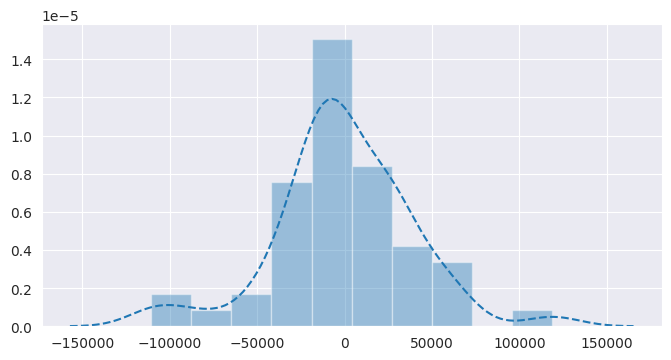

In [569]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4),dpi=100)  
sns.distplot(stress_loss,hist=True, kde=True, rug=False,norm_hist = True,
kde_kws={'linestyle':'--'}, 
label='stress loss')

# **Set 10 bins to make histogram**

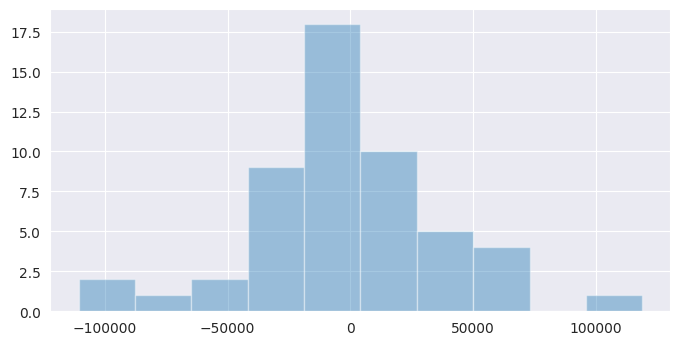

In [570]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4),dpi=100)  
sns.distplot(stress_loss, bins=10,hist=True, kde=False, rug=False,norm_hist = False,
kde_kws={'linestyle':'--'}, 
label='stress loss')

# **make Empirical loss distribution graph**

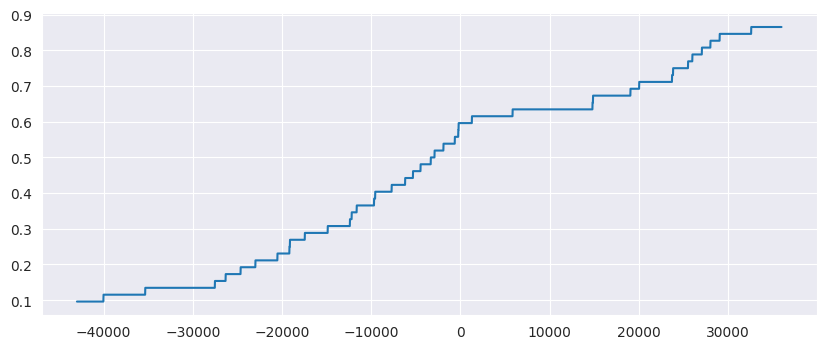

In [571]:
plt.figure(figsize=(10,4),dpi=100) 
length=len(stress_loss)
x=np.linspace(-43000,36000,8000)
y=[]
for i in range(8000):
  m=x[i]
  function=[0]*(length+1)
  if m<stress_loss[0]:
    function[0]=0
  if m>=stress_loss[(length-1)]:
    function[length]=1
  for j in range((length-1)):
    if m>=stress_loss[j] and m<stress_loss[j+1]:
      function[j+1]=(1+j)/length
  b=0
  for n in range((length+1)):
    b+=function[n]
  y.append(b)
plt.plot(x,y)

# **因为python实现不了断点作图，所以在每一段端点python绘图都连上了，实际情况在每一段端点处应断开，每一段都取左端点不取右端点，写report的时候注明。**

In [572]:
0.99*53

52.47

In [573]:
0.95*53

50.349999999999994

**SVAR0.99 = 118913.35**

**SVAR0.95 = 59849.20**

# **Now we work on the second scenario --- global economic crisis 2015~2016**

In [574]:
B30= drd.get_data_yahoo('^TYX','08/19/2015','08/16/2016',interval='d')
tradingdays2=B30.index
tradingdays2
len(tradingdays2)

weektime2=[]
for i in tradingdays2:
  if i.weekday() == 2:
    weektime2.append(i)
len(weektime2)

nan_list=[]
nan_index=[]
for i in range(50):
  if weektime2[i+1]-weektime2[i] != pd.Timedelta('7 days'):
    nan_list.append(weektime2[i])
    nan_index.append(i)


#weektime: wednesday date list
#weektime[-1]
print(nan_index)
print(nan_list)

[]
[]


In [0]:
AAPL= drd.get_data_yahoo('AAPL','08/19/2015','08/16/2016',interval='d')
TSLA= drd.get_data_yahoo('TSLA','08/19/2015','08/16/2016',interval='d')
GILD= drd.get_data_yahoo('GILD','08/19/2015','08/16/2016',interval='d')
MELI= drd.get_data_yahoo('MELI','08/19/2015','08/16/2016',interval='d')
MSFT= drd.get_data_yahoo('MSFT','08/19/2015','08/16/2016',interval='d')
DIS= drd.get_data_yahoo('DIS','08/19/2015','08/16/2016',interval='d')
NVDA= drd.get_data_yahoo('NVDA','08/19/2015','08/16/2016',interval='d')
TCO= drd.get_data_yahoo('TCO','08/19/2015','08/16/2016',interval='d')
MMM= drd.get_data_yahoo('MMM','08/19/2015','08/16/2016',interval='d')
INCY= drd.get_data_yahoo('INCY','08/19/2015','08/16/2016',interval='d')
IBM= drd.get_data_yahoo('IBM','08/19/2015','08/16/2016',interval='d')
EPC= drd.get_data_yahoo('EPC','08/19/2015','08/16/2016',interval='d')
SPY= drd.get_data_yahoo('SPY','08/19/2015','08/16/2016',interval='d')
YELP= drd.get_data_yahoo('YELP','08/19/2015','08/16/2016',interval='d')
VTI= drd.get_data_yahoo('VTI','08/19/2015','08/16/2016',interval='d')

In [0]:
stock_list=[AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI]
index_list=['AAPL','TSLA','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','YELP','VTI']

from datetime import date
total_num=len(tradingdays2)
date_list2=[]
for i in range(total_num-1):
  if tradingdays2[i].day > tradingdays2[i+1].day:
    date_list2.append(tradingdays2[i])

def new_portfolio():
    res = pd.DataFrame(columns=['Share', 'Adj Close'],index=pd.Series(index_list))
    return res

my_port = new_portfolio()
update_list=[]

for j in range(len(date_list2)):
  b=date_list2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a,'Adj Close']=stock_list[i].loc[b,'Adj Close']
  update_list.append(my_port)

for i in range(len(index_list)):
    a=index_list[i]
    update_list[0].loc[a,'Share']=(400000/15)/update_list[0].loc[a,'Adj Close']

def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a,'Share']*portfolio2.loc[a,'Adj Close']
  return res

for i in range(len(update_list)-1):
  to_value=total_value(update_list[i],update_list[i+1])
  for j in range(len(index_list)):
    a=index_list[j]
    update_list[i+1].loc[a,'Share']=(to_value/15)/update_list[i+1].loc[a,'Adj Close']

In [0]:
week_stock2=[] #所有Wednesday的portfolio

for j in range(len(weektime2)):
  b=weektime2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  week_stock2.append(my_port)
week_stock2

m=0
for i in range(len(week_stock2)):
  if weektime2[i].month <= date_list2[m].month:
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']
  else:
    m+=1
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']

In [578]:
len(week_stock2)

52

In [579]:
stock_value=[]
for j in range(len(week_stock2)):
  v=0
  for i in range(len(index_list)):
    a=index_list[i]
    v+=week_stock2[j].loc[a,'Adj Close']*week_stock2[j].loc[a,'Share']
  stock_value.append(v)

len(stock_value)

52

In [0]:
stock_loss=[]
for i in range(51):
  a=stock_value[i+1]-stock_value[i]
  stock_loss.append(-a)

In [581]:
stock_loss

[26909.739074867044,
 -12112.154403672263,
 3140.3714221300907,
 -15082.182201119955,
 18446.807068374357,
 5776.264999270323,
 -14164.339551328681,
 3895.9510562858777,
 -4655.967937213136,
 -17234.50387136842,
 -6984.513322661107,
 4378.605329992541,
 -6948.778489029908,
 -6885.379041238222,
 -4199.803271856916,
 9494.310443336086,
 -4666.984390139987,
 6222.841121778183,
 -1559.1737050380907,
 20269.95538096543,
 31925.696244513034,
 12868.673080077278,
 -2156.978880024748,
 183.3207466721069,
 20659.66789231263,
 -21176.355889559316,
 -8550.648674973869,
 -12350.640295460063,
 -800.2868333293591,
 -6961.988439881476,
 -1125.851406067086,
 -9379.259067853971,
 -12266.650834345783,
 -2214.3853237766307,
 -1061.8406917097163,
 5336.929371458245,
 16019.994351083296,
 -6559.401756082661,
 -6244.994457445748,
 -12905.327954094508,
 -3902.894025369431,
 -4887.0384089203435,
 9899.906193107949,
 -1712.483755259891,
 -1185.3545238093939,
 -8916.495358468615,
 -14258.27338664612,
 -7365.252

In [582]:
bond30= drd.get_data_yahoo('^TYX','08/19/2015','08/16/2016',interval='d')

for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=bond30.loc[a,'Adj Close']
  bond30.loc[a,'Adj Close']=b*0.01

week_bond=[]
for i in range(len(weektime2)):
  a=weektime2[i]
  b=bond30.loc[a,'Adj Close']
  week_bond.append(b)

a=27
maturity_list=[a,]
for i in range(len(weektime2)-1):
  a=a-7/365
  maturity_list.append(a)

bond_price=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list[i]*week_bond[i])
  bond_price.append(a)

bond_price

[0.467138261694878,
 0.45335596039451437,
 0.449592925068236,
 0.45252295484362187,
 0.4349744188567167,
 0.4532779076604843,
 0.461032814143225,
 0.460544579241648,
 0.46665069838059847,
 0.4629137213864548,
 0.4641630941189301,
 0.44840255974995963,
 0.4349419471428687,
 0.4433089716215753,
 0.4490555859113769,
 0.46000063246171063,
 0.45391271447217957,
 0.4488711502756196,
 0.4497287234321302,
 0.4447444342769566,
 0.45725077220897054,
 0.46884175080868146,
 0.4805818518117307,
 0.47664017897408745,
 0.4877757200702216,
 0.5113481195453142,
 0.4907468702484341,
 0.502709661256532,
 0.4904733638400521,
 0.491895918422821,
 0.48530455034246484,
 0.4968430328478386,
 0.49604727489603867,
 0.5060788560017484,
 0.5071306976524947,
 0.49641389819032633,
 0.4917264562757338,
 0.49940905879222786,
 0.5074671813811522,
 0.4943037092305132,
 0.49637785977225896,
 0.502261746646881,
 0.5177471390968476,
 0.5303444523683104,
 0.520692162158078,
 0.5510535540917587,
 0.5700363091468917,
 0.5665

In [583]:
bond_price=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list[i]*week_bond[i])
  bond_price.append(a)

bondshare=600000/bond_price[0]
bond_loss=[]
for i in range(len(weektime2)-1):
  a=bondshare*(bond_price[i+1]-bond_price[i])
  bond_loss.append(-a)
bond_loss

[17702.21251030708,
 4833.30392928029,
 -3763.378017576753,
 22539.625750074872,
 -23509.299457542096,
 -9960.528330012043,
 627.0968682448623,
 -7842.798982206473,
 4799.834182605942,
 -1604.7147085862084,
 20243.087318672446,
 17289.03030754054,
 -10746.742664601114,
 -7381.045092240989,
 -14057.996247992305,
 7819.421129122832,
 6475.4672566551635,
 -1101.4809449337486,
 6401.9022596302275,
 -16063.344355444056,
 -14887.64190412024,
 -15079.177150405476,
 5062.748861558037,
 -14302.670548627711,
 -30276.7742332648,
 26460.580499830216,
 -15365.20382384568,
 15716.499914287542,
 -1827.15230082962,
 8466.060634521247,
 -14820.215064605925,
 1022.0844881077528,
 -12884.726336883215,
 -1351.0025664736208,
 13764.831966389003,
 6020.626823740125,
 -9867.659936850285,
 -10349.9840407263,
 16907.378260405094,
 -2664.0727747972846,
 -7557.360238410767,
 -19889.690551720952,
 -16180.194564783144,
 12397.558926402404,
 -38996.66684144825,
 -24381.760106217178,
 4461.316446678975,
 22126.49317

In [0]:
libor2015=[0.00133,0.00133,0.00133,0.00135,0.00137,0.00136,0.00116,0.00132,0.00132,0.00132,0.00132,0.00131,0.00131,0.00131,0.001305,0.001305,0.001295,0.001518,0.003673,0.003661,0.003661,0.003663,0.003655,0.003659,0.003686,0.003731,0.003700,0.003715,0.003715,0.003720,0.003743,0.003753,0.003772,0.003782,0.003802,0.003822,0.003802,0.003858,0.003850,0.003850,0.003861,0.003855,0.003876,0.003850,0.003896,0.004051,0.004112,0.004127,0.004174,0.004164,0.004174,0.004197]

In [0]:
def vol_finder(sigma,weektime):
  len(sigma)
  tradingdays3=sigma.index
  vol=[]
  for i in range(len(weektime)):
    a=list(tradingdays3).index(weektime[i])
    b=np.log(np.array(sigma[:a]['Adj Close'])).std()
    vol.append(b)
  return vol
  
def option_finder(stock,libor,vol,k,maturity,weektime,otype):
  option=[]
  for i in range(len(weektime)):
    a=weektime[i]
    d1 = (np.log(stock.loc[a,'Adj Close'] / k) + (libor[i] + 0.5 * vol[i] ** 2) * maturity[i]) / (vol[i] * np.sqrt(maturity[i]))
    d2 = d1 - vol[i] * np.sqrt(maturity[i])
    price=(otype * stock.loc[a,'Adj Close'] * ss.norm.cdf(otype * d1) - otype * np.exp(-libor[i] * maturity[i]) * k * ss.norm.cdf(otype * d2))
    option.append(price)
  return option

In [0]:
mmm_sigma=drd.get_data_yahoo('MMM','01/15/2014','08/16/2016',interval='d')
mmm_vol=vol_finder(mmm_sigma,weektime2)
spx_sigma=drd.get_data_yahoo('SPY','01/15/2014','08/16/2016',interval='d')
spx_vol=vol_finder(spx_sigma,weektime2)
meli_sigma=drd.get_data_yahoo('MELI','01/15/2014','08/16/2016',interval='d')
meli_vol=vol_finder(meli_sigma,weektime2)

In [587]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=SPY.loc[a,'Adj Close']
  SPY.loc[a,'Adj Close']=b*10
SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-19,210.009995,207.350006,209.089996,208.320007,172946000.0,1894.293671
2015-08-20,208.289993,203.899994,206.509995,203.970001,194327900.0,1854.738617
2015-08-21,203.940002,197.520004,201.729996,197.830002,346588500.0,1798.905792
2015-08-24,197.479996,182.399994,187.490005,189.500000,507244300.0,1723.159637
2015-08-25,195.449997,186.919998,195.429993,187.270004,369833100.0,1702.882385
...,...,...,...,...,...,...
2016-08-10,218.399994,217.229996,218.309998,217.639999,57941100.0,2021.952362
2016-08-11,218.940002,217.949997,218.259995,218.649994,72504300.0,2031.335602
2016-08-12,218.710007,217.990005,218.289993,218.460007,61313500.0,2029.570312


In [0]:
a=12+30+31+30+31+31+29+31+30+31+30+31+31+1
#2015.08.19---2016.09.01
maturity=[a/365,]
for i in range(len(weektime2)-1):
  a=a-7
  maturity.append(a/365)

In [589]:
#2015.08.19 MMM:128.79  SPX:1894.3   MELI:112.92
MMM_strike1=(130/159.76)*128.79
SPX_strike1=(2885/3350)*1894.3
MELI_strike1=(640/718.53)*112.92
print(MMM_strike1,SPX_strike1,MELI_strike1)

104.79907361041563 1631.3598507462684 100.57868147467747


In [590]:
import scipy.stats as ss
mmm_option=option_finder(MMM,libor2015,mmm_vol,104.8,maturity,weektime2,1)
spx_option=option_finder(SPY,libor2015,spx_vol,1631.36,maturity,weektime2,-1)
meli_option=option_finder(MELI,libor2015,meli_vol,100.579,maturity,weektime2,1)
mmm_option

[24.171664520899284,
 21.417311923273573,
 20.12433431123675,
 19.78771002214343,
 22.68801289869117,
 17.013745977102616,
 20.532221929641537,
 25.5991942831308,
 26.282018462509697,
 27.600529141581617,
 34.887146617975304,
 35.616345931858916,
 35.73729488237895,
 35.182081968055854,
 35.39230740067035,
 33.674543140288236,
 33.98212003047597,
 28.575649690568568,
 29.803799602149923,
 30.46203893540762,
 23.862616686764042,
 18.739884516202167,
 17.17604147483189,
 24.780939869056766,
 30.968809840702875,
 31.88065930835333,
 35.60414431647962,
 36.13461762206312,
 38.08744628697235,
 38.68894907758704,
 41.1889472839824,
 42.41719201648617,
 44.63044569706271,
 44.67699632477574,
 46.263552910598705,
 46.56995370193543,
 45.50534078994549,
 44.96257255654507,
 47.29082673204246,
 45.636796422105775,
 48.48580921516425,
 47.3064966538486,
 49.75921360329268,
 46.48891593490305,
 49.572834580002365,
 49.82920861175202,
 53.102022816386224,
 56.74339252284547,
 58.72709147239185,
 55

In [591]:
a=weektime2[0]
share_mmm=400000/(15*MMM.loc[a,'Adj Close'])
share_mmm

207.0560372887905

In [592]:
mmm_loss=[]
for i in range(len(mmm_option)-1):
  loss=200*(mmm_option[i+1]-mmm_option[i])
  mmm_loss.append(loss)
mmm_loss

[-550.8705195251423,
 -258.59552240736434,
 -67.32485781866444,
 580.0605753095482,
 -1134.8533843177108,
 703.6951905077842,
 1013.3944706978525,
 136.56483587577952,
 263.70213581438406,
 1457.3234952787375,
 145.83986277672238,
 24.189790104006192,
 -111.04258286461857,
 42.0450865228986,
 -343.55285207642225,
 61.5153780375465,
 -1081.29406798148,
 245.6299823162709,
 131.6478666515394,
 -1319.8844497287155,
 -1024.546434112375,
 -312.7686082740553,
 1520.979678844975,
 1237.5739943292217,
 182.36989353009108,
 744.6970016252578,
 106.09466111669974,
 390.56573298184674,
 120.30055812293767,
 499.9996412790722,
 245.6489465007536,
 442.6507361153085,
 9.310125542606329,
 317.3113171645923,
 61.28015826734554,
 -212.92258239798798,
 -108.55364668008463,
 465.6508350994784,
 -330.80606198733733,
 569.8025586116955,
 -235.86251226313095,
 490.54338988881625,
 -654.0595336779262,
 616.7837290198634,
 51.27480634993162,
 654.5628409268403,
 728.2739412918488,
 396.73978990927594,
 -569.

In [593]:
a=weektime2[0]
share_spx=400000/(15*SPY.loc[a,'Adj Close'])
share_spx

14.077366714452406

In [594]:
spx_loss=[]
for i in range(len(spx_option)-1):
  loss=100*(spx_option[i+1]-spx_option[i])
  spx_loss.append(-loss)
spx_loss

[-340.8338035542723,
 79.50845288701345,
 -17.922262395778432,
 213.179248682912,
 -185.32463026080777,
 -115.92216083805482,
 326.81945593797224,
 3.9591782656643204,
 30.049269887581076,
 21.66331576700127,
 1.035064955755205,
 -1.5477238146919703,
 1.1272583995976637,
 0.4992637297180802,
 -0.19113744323863147,
 -2.3827094018782136,
 2.6302355291542234,
 0.0335835374927429,
 0.15531426641056667,
 -10.77777285093987,
 -221.44791951897264,
 -261.40552735702016,
 250.71787922016568,
 157.62285898144697,
 -370.1464004299446,
 416.1905211205525,
 9.64045505557145,
 28.406347657246656,
 0.7937256766155532,
 1.237040166125336,
 0.07188352097584824,
 0.04274104895574697,
 0.002730506621897782,
 0.0018723734448218067,
 0.0003417142260437491,
 3.5715708481231763e-06,
 -0.0005540477718839927,
 0.0005162875552520556,
 -4.6493034327251426e-05,
 0.00011692159095715816,
 4.2511407170708105e-07,
 3.582098034723862e-08,
 -2.8661936068066153e-08,
 2.8691148892428533e-08,
 1.9906533564881092e-10,
 2.5

In [595]:
a=weektime2[0]
share_meli=400000/(15*MELI.loc[a,'Adj Close'])
share_meli

236.16290947111744

In [596]:
meli_loss=[]
for i in range(len(meli_option)-1):
  loss=300*(meli_option[i+1]-meli_option[i])
  meli_loss.append(-loss)
meli_loss

[1907.1366418253156,
 -981.2190666850619,
 415.6475132382234,
 -218.0074371743494,
 2620.415886601865,
 147.65939642764963,
 -350.27232218085055,
 398.34884261094317,
 -430.9655178321282,
 -196.81874716538346,
 -1589.2927943308584,
 -2946.0800193980454,
 -292.75538830631547,
 -1395.5556723944014,
 474.69314212523415,
 2079.008441312807,
 56.435717355861925,
 690.4053919617013,
 -145.1524008086153,
 1633.521114584012,
 1258.8251988770303,
 605.982711670383,
 -90.98356492520807,
 237.39869777741873,
 570.3154200971447,
 -862.6406738224808,
 -711.2340792791699,
 -496.66904495972017,
 -1143.8210323570204,
 -600.73251640285,
 354.55083970704635,
 -1419.7920258094186,
 -485.34071660497347,
 -1696.1683019128955,
 -1203.929271619144,
 1052.9770391541945,
 459.2755833007729,
 -1579.2208691379344,
 -831.3849387280427,
 -450.9368136458832,
 -689.8020725712015,
 -194.82931446753753,
 960.329968832589,
 -797.7634581188213,
 -790.7358615227025,
 -213.05617783321225,
 -2862.9822121609977,
 -924.00076

In [598]:
stress_loss=np.sum([meli_loss,spx_loss,mmm_loss,bond_loss,stock_loss], axis = 0)
stress_loss
stress_loss.sort()
stress_loss

array([-4.09214824e+04, -3.28567488e+04, -3.09514746e+04, -2.56274050e+04,
       -2.45113515e+04, -2.44810149e+04, -1.81268504e+04, -1.80981919e+04,
       -1.80229553e+04, -1.75570505e+04, -1.56194355e+04, -1.54505349e+04,
       -1.53457948e+04, -1.46500688e+04, -1.25473011e+04, -1.24867543e+04,
       -1.23859188e+04, -1.19316652e+04, -9.33427313e+03, -9.23456743e+03,
       -8.43915661e+03, -5.97401794e+03, -4.94424300e+03, -3.76225452e+03,
       -3.65016588e+03, -3.44883090e+03, -3.40797507e+03, -2.17869549e+03,
       -2.92606202e+02,  6.65213326e+00,  7.86254751e+02,  1.40457636e+03,
        3.28816265e+03,  4.50946992e+03,  4.58648397e+03,  4.82937933e+03,
        5.58247146e+03,  6.05742913e+03,  6.50305580e+03,  8.03267594e+03,
        9.50019276e+03,  1.00375053e+04,  1.05040954e+04,  1.15603425e+04,
        1.18161561e+04,  1.21976107e+04,  1.42339794e+04,  1.70508852e+04,
        1.87441977e+04,  1.94518727e+04,  4.56273839e+04])

# **绘制pdf**

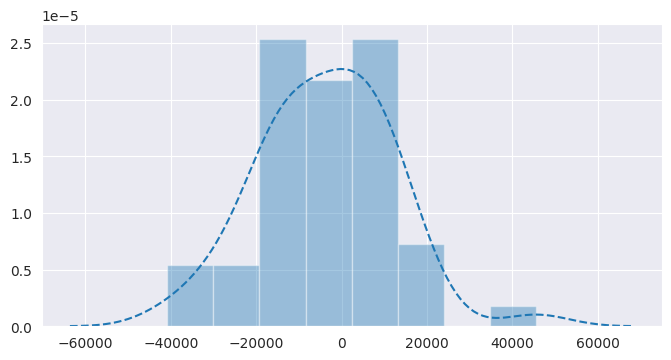

In [599]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4),dpi=100)  
sns.distplot(stress_loss,hist=True, kde=True, rug=False,norm_hist = True,
kde_kws={'linestyle':'--'}, 
label='stress loss')

# **设定10bins来绘制histogram**

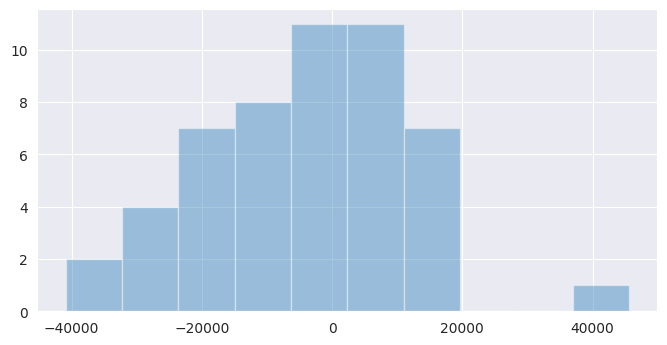

In [600]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4),dpi=100)  
sns.distplot(stress_loss, bins=10,hist=True, kde=False, rug=False,norm_hist = False,
kde_kws={'linestyle':'--'}, 
label='stress loss')

# **绘制empirical loss distribution**

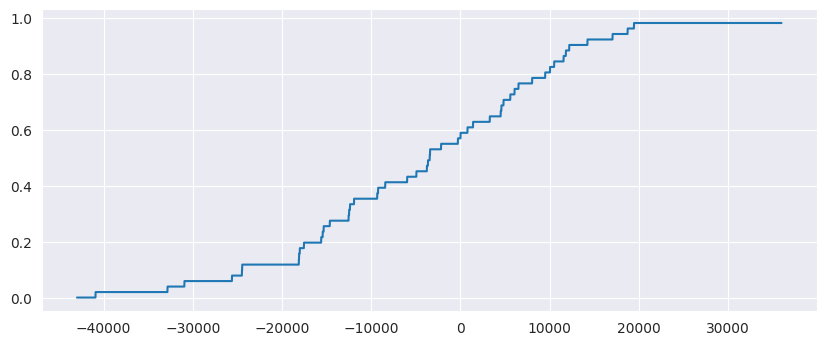

In [601]:
plt.figure(figsize=(10,4),dpi=100) 
length=51
x=np.linspace(-43000,36000,8000)
y=[]
for i in range(8000):
  m=x[i]
  function=[0]*(length+1)
  if m<stress_loss[0]:
    function[0]=0
  if m>=stress_loss[(length-1)]:
    function[length]=1
  for j in range((length-1)):
    if m>=stress_loss[j] and m<stress_loss[j+1]:
      function[j+1]=(1+j)/length
  b=0
  for n in range((length+1)):
    b+=function[n]
  y.append(b)
plt.plot(x,y)

# **因为python实现不了断点，所以在每一段端点python绘图都连上了，实际情况在每一段端点处应断开，每一段都取左端点不取右端点，写report的时候注明。**

In [750]:
0.99*52

51.48

In [751]:
0.95*52

49.4

**SVAR0.99 = 45627.38**

**SVAR0.95 = 18744.20**

# **Now we compute stress test of the current market disaster to compare with the scenarios.**

In [785]:
B30= drd.get_data_yahoo('^TYX','05/06/2019','05/06/2020',interval='d')
tradingdays2=B30.index
tradingdays2
len(tradingdays2)

251

In [786]:
weektime2=[]
for i in tradingdays2:
  if i.weekday() == 2:
    weektime2.append(i)
len(weektime2)
nan_list=[]
nan_index=[]
for i in range(49):
  if weektime2[i+1]-weektime2[i] != pd.Timedelta('7 days'):
    nan_list.append(weektime2[i])
    nan_index.append(i)


#weektime: wednesday date list
#weektime[-1]
print(nan_index)
print(nan_list)

[7, 31]
[Timestamp('2019-06-26 00:00:00'), Timestamp('2019-12-18 00:00:00')]


In [787]:
p1=pd.Timestamp(2019,7,2)
p2=pd.Timestamp(2019,12,23)
p3=pd.Timestamp(2019,12,31)
weektime2.insert(8,p1)
weektime2.insert(33,p2)
weektime2.insert(34,p3)
len(weektime2)

53

In [788]:
weektime2

[Timestamp('2019-05-08 00:00:00'),
 Timestamp('2019-05-15 00:00:00'),
 Timestamp('2019-05-22 00:00:00'),
 Timestamp('2019-05-29 00:00:00'),
 Timestamp('2019-06-05 00:00:00'),
 Timestamp('2019-06-12 00:00:00'),
 Timestamp('2019-06-19 00:00:00'),
 Timestamp('2019-06-26 00:00:00'),
 Timestamp('2019-07-02 00:00:00'),
 Timestamp('2019-07-10 00:00:00'),
 Timestamp('2019-07-17 00:00:00'),
 Timestamp('2019-07-24 00:00:00'),
 Timestamp('2019-07-31 00:00:00'),
 Timestamp('2019-08-07 00:00:00'),
 Timestamp('2019-08-14 00:00:00'),
 Timestamp('2019-08-21 00:00:00'),
 Timestamp('2019-08-28 00:00:00'),
 Timestamp('2019-09-04 00:00:00'),
 Timestamp('2019-09-11 00:00:00'),
 Timestamp('2019-09-18 00:00:00'),
 Timestamp('2019-09-25 00:00:00'),
 Timestamp('2019-10-02 00:00:00'),
 Timestamp('2019-10-09 00:00:00'),
 Timestamp('2019-10-16 00:00:00'),
 Timestamp('2019-10-23 00:00:00'),
 Timestamp('2019-10-30 00:00:00'),
 Timestamp('2019-11-06 00:00:00'),
 Timestamp('2019-11-13 00:00:00'),
 Timestamp('2019-11-

In [0]:
AAPL= drd.get_data_yahoo('AAPL','05/06/2019','05/06/2020',interval='d')
TSLA= drd.get_data_yahoo('TSLA','05/06/2019','05/06/2020',interval='d')
GILD= drd.get_data_yahoo('GILD','05/06/2019','05/06/2020',interval='d')
MELI= drd.get_data_yahoo('MELI','05/06/2019','05/06/2020',interval='d')
MSFT= drd.get_data_yahoo('MSFT','05/06/2019','05/06/2020',interval='d')
DIS= drd.get_data_yahoo('DIS','05/06/2019','05/06/2020',interval='d')
NVDA= drd.get_data_yahoo('NVDA','05/06/2019','05/06/2020',interval='d')
TCO= drd.get_data_yahoo('TCO','05/06/2019','05/06/2020',interval='d')
MMM= drd.get_data_yahoo('MMM','05/06/2019','05/06/2020',interval='d')
INCY= drd.get_data_yahoo('INCY','05/06/2019','05/06/2020',interval='d')
IBM= drd.get_data_yahoo('IBM','05/06/2019','05/06/2020',interval='d')
EPC= drd.get_data_yahoo('EPC','05/06/2019','05/06/2020',interval='d')
SPY= drd.get_data_yahoo('SPY','05/06/2019','05/06/2020',interval='d')
YELP= drd.get_data_yahoo('YELP','05/06/2019','05/06/2020',interval='d')
VTI= drd.get_data_yahoo('VTI','05/06/2019','05/06/2020',interval='d')

In [0]:
stock_list=[AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI]
index_list=['AAPL','TSLA','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','YELP','VTI']

from datetime import date
total_num=len(tradingdays2)
date_list2=[]
for i in range(total_num-1):
  if tradingdays2[i].day > tradingdays2[i+1].day:
    date_list2.append(tradingdays2[i])

def new_portfolio():
    res = pd.DataFrame(columns=['Share', 'Adj Close'],index=pd.Series(index_list))
    return res

my_port = new_portfolio()
update_list=[]

for j in range(len(date_list2)):
  b=date_list2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a,'Adj Close']=stock_list[i].loc[b,'Adj Close']
  update_list.append(my_port)

for i in range(len(index_list)):
    a=index_list[i]
    update_list[0].loc[a,'Share']=(400000/15)/update_list[0].loc[a,'Adj Close']

def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a,'Share']*portfolio2.loc[a,'Adj Close']
  return res

for i in range(len(update_list)-1):
  to_value=total_value(update_list[i],update_list[i+1])
  for j in range(len(index_list)):
    a=index_list[j]
    update_list[i+1].loc[a,'Share']=(to_value/15)/update_list[i+1].loc[a,'Adj Close']

In [0]:
week_stock2=[] #所有Wednesday的portfolio

for j in range(len(weektime2)):
  b=weektime2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  week_stock2.append(my_port)
week_stock2

m=0
for i in range(len(week_stock2)):
  if weektime2[i].month <= date_list2[m].month:
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']
  else:
    m+=1
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']

In [792]:
len(week_stock2)

53

In [0]:
for j in range(len(week_stock2)):
  v=0
  for i in range(len(index_list)):
    a=index_list[i]
    v+=week_stock2[j].loc[a,'Adj Close']*week_stock2[j].loc[a,'Share']
  stock_value.append(v)


In [0]:
stock_loss=[]
for i in range(52):
  a=stock_value[i+1]-stock_value[i]
  stock_loss.append(-a)

In [795]:
stock_loss

[26909.739074867044,
 -12112.154403672263,
 3140.3714221300907,
 -15082.182201119955,
 18446.807068374357,
 5776.264999270323,
 -14164.339551328681,
 3895.9510562858777,
 -4655.967937213136,
 -17234.50387136842,
 -6984.513322661107,
 4378.605329992541,
 -6948.778489029908,
 -6885.379041238222,
 -4199.803271856916,
 9494.310443336086,
 -4666.984390139987,
 6222.841121778183,
 -1559.1737050380907,
 20269.95538096543,
 31925.696244513034,
 12868.673080077278,
 -2156.978880024748,
 183.3207466721069,
 20659.66789231263,
 -21176.355889559316,
 -8550.648674973869,
 -12350.640295460063,
 -800.2868333293591,
 -6961.988439881476,
 -1125.851406067086,
 -9379.259067853971,
 -12266.650834345783,
 -2214.3853237766307,
 -1061.8406917097163,
 5336.929371458245,
 16019.994351083296,
 -6559.401756082661,
 -6244.994457445748,
 -12905.327954094508,
 -3902.894025369431,
 -4887.0384089203435,
 9899.906193107949,
 -1712.483755259891,
 -1185.3545238093939,
 -8916.495358468615,
 -14258.27338664612,
 -7365.252

In [796]:
bond30= drd.get_data_yahoo('^TYX','05/06/2019','05/06/2020',interval='d')

for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=bond30.loc[a,'Adj Close']
  bond30.loc[a,'Adj Close']=b*0.01

week_bond=[]
for i in range(len(weektime2)):
  a=weektime2[i]
  b=bond30.loc[a,'Adj Close']
  week_bond.append(b)

a=27
maturity_list=[a,]
for i in range(len(weektime2)-1):
  a=a-7/365
  maturity_list.append(a)

bond_price=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list[i]*week_bond[i])
  bond_price.append(a)

len(bond_price)

53

In [797]:
a=25+(23+30+31+15)/365
#2019.5.8---2047.8.15
maturity_list2=[a,]
for i in range(len(weektime2)-1):
  a=a-7/365
  maturity_list2.append(a)
bond_price2=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list2[i]*week_bond[i])
  bond_price2.append(a)
len(bond_price2)

a=28+(23+30+31+15)/365
#2019.5.8---2047.8.15
maturity_list1=[a,]
for i in range(len(weektime2)-1):
  a=a-7/365
  maturity_list1.append(a)
bond_price1=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list1[i]*week_bond[i])
  bond_price1.append(a)
len(bond_price1)

53

In [0]:
bond10=bond_price1[:20]+[0.57639,0.59218,0.59413,0.57203,0.56817,0.56815,0.55983,0.55275,0.57484,0.57900,0.57290,0.57439,0.55673,0.55915,0.55142,0.55145,0.57239,0.572375,0.598495,0.584175,0.592505,0.604465,0.63292,0.64429,0.68259,0.62449,0.694705,0.73483,0.71203,0.732635,0.73774,0.72552,0.70000]

In [0]:
bond30=bond_price2[:20]+[0.53646,0.55261,0.55369,0.53157,0.52788,0.52883,0.52192,0.51420,0.53706,0.54177,0.53544,0.53640,0.51922,0.52123,0.51292,0.51662,0.536425,0.537195,0.564690,0.548540,0.556420,0.569590,0.598885,0.613025,0.654810,0.586930,0.657060,0.702030,0.676945,0.698375,0.70697,0.69806,0.66928]

In [800]:
bondshare10=300000/bond10[0]
bondshare30=300000/bond30[0]
bond_loss=[]
for i in range(len(weektime2)-1):
  a=bondshare10*(bond10[i+1]-bond10[i])+bondshare30*(bond30[i+1]-bond30[i])
  bond_loss.append(-a)
bond_loss

[-11026.635878759764,
 -1148.6382448804209,
 -24524.743751962007,
 -7166.369098428921,
 -2046.2829508732066,
 -14785.886462257844,
 4066.613668296838,
 -10547.159613932823,
 10949.241042780623,
 25.34615153542901,
 547.6658419761324,
 -9266.532764635933,
 -61198.50305958977,
 -34209.24078563218,
 5328.168042835805,
 -23655.53224425482,
 3412.5879495329473,
 49706.00853700149,
 5042.815480556648,
 -4827.358482719104,
 -20775.152038543543,
 -1996.3243100680943,
 28776.07613723391,
 4918.034688790082,
 -577.8699015954134,
 9950.824165039783,
 9613.221741662925,
 -29229.994168172863,
 -5756.747046962482,
 8082.473855787452,
 -1609.3008365583028,
 22686.031960487715,
 -2894.4251270501813,
 10421.85604036157,
 -2323.9056597730137,
 -26547.2340285901,
 -469.2006416988317,
 -34851.7851948148,
 19777.104632728784,
 -10561.513934257706,
 -16319.515803404323,
 -37557.75878892794,
 -16522.83928453458,
 -52017.955617404165,
 81707.20718575461,
 -91333.41122310594,
 -55239.937927003906,
 31097.27957

In [0]:
libor2019=[0.02363,0.02349,0.02355,0.02356,0.02345,0.02350,0.02341,0.02354,0.02356,0.02355,0.02363,0.02352,0.02352,0.02099,0.02092,0.02093,0.02087,0.02091,0.02095,0.02185,0.01841,0.01851,0.01790,0.01823,0.01814,0.01804,0.01537,0.01539,0.01529,0.01540,0.01529,0.01525,0.01534,0.01533,0.01543,0.01533,0.01528,0.01533,0.01530,0.01575,0.01574,0.01577,0.01571,0.01088,0.01084,0.00380,0.00201,0.00109,0.00072,0.00066,0.00064,0.00055,0.00060]

In [802]:
len(libor2019)

53

In [0]:
def vol_finder(sigma,weektime):
  len(sigma)
  tradingdays3=sigma.index
  vol=[]
  for i in range(len(weektime)):
    a=list(tradingdays3).index(weektime[i])
    b=np.log(np.array(sigma[:a]['Adj Close'])).std()
    vol.append(b)
  return vol
  
def option_finder(stock,libor,vol,k,maturity,weektime,otype):
  option=[]
  for i in range(len(weektime)):
    a=weektime[i]
    d1 = (np.log(stock.loc[a,'Adj Close'] / k) + (libor[i] + 0.5 * vol[i] ** 2) * maturity[i]) / (vol[i] * np.sqrt(maturity[i]))
    d2 = d1 - vol[i] * np.sqrt(maturity[i])
    price=(otype * stock.loc[a,'Adj Close'] * ss.norm.cdf(otype * d1) - otype * np.exp(-libor[i] * maturity[i]) * k * ss.norm.cdf(otype * d2))
    option.append(price)
  return option

In [804]:
mmm_sigma=drd.get_data_yahoo('MMM','01/03/2018','05/06/2020',interval='d')
mmm_vol=vol_finder(mmm_sigma,weektime2)
spx_sigma=drd.get_data_yahoo('SPY','01/03/2018','05/06/2020',interval='d')
spx_vol=vol_finder(spx_sigma,weektime2)
meli_sigma=drd.get_data_yahoo('MELI','01/03/2018','05/06/2020',interval='d')
meli_vol=vol_finder(meli_sigma,weektime2)
len(meli_vol)

53

In [805]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=SPY.loc[a,'Adj Close']
  SPY.loc[a,'Adj Close']=b*10
SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-06,293.309998,288.899994,289.250000,292.820007,107198100.0,2869.566956
2019-05-07,290.809998,285.809998,290.149994,287.929993,144729900.0,2821.646118
2019-05-08,289.429993,286.869995,287.529999,287.529999,91568300.0,2817.725830
2019-05-09,287.329987,283.299988,285.230011,286.660004,103471100.0,2809.200439
2019-05-10,288.940002,282.299988,285.619995,288.100006,112429300.0,2823.312073
...,...,...,...,...,...,...
2020-04-30,293.320007,288.589996,291.709991,290.480011,122901700.0,2904.800110
2020-05-01,290.660004,281.519989,285.309998,282.790009,125180000.0,2827.900085
2020-05-04,283.899994,279.130005,280.739990,283.570007,80873200.0,2835.700073


In [806]:
a=23+30+31+31+30+31+30+31+31+29+31+30+31+30+17
#2019.5.8---2020.7.17
maturity1=[a/365,]
for i in range(len(weektime2)-1):
  a=a-7
  maturity1.append(a/365)

a=23+30+31+31+30+31+30+31+31+29+31+30+14
#2019.5.8---2020.5.14
maturity2=[a/365,]
for i in range(len(weektime2)-1):
  a=a-7
  maturity2.append(a/365)

a=23+30+31+31+30+31+30+31+31+29+31+30+31+19
#2019.5.8---2020.6.19
maturity3=[a/365,]
for i in range(len(weektime2)-1):
  a=a-7
  maturity3.append(a/365)

len(maturity3)

53

In [807]:
len(weektime2)

53

In [808]:
#2019.5.6 MMM:146.2  SPX:2869.6   MELI:567.69
MMM_strike1=(130/159.76)*146.2
SPX_strike1=(2885/3350)*2869.6
MELI_strike1=(640/718.53)*567.69
print(MMM_strike1,SPX_strike1,MELI_strike1)

118.96594892338508 2471.282388059701 505.6456932904681


In [0]:
import scipy.stats as ss
mmm_option=option_finder(MMM,libor2019,mmm_vol,118.966,maturity1,weektime2,1)
spx_option=option_finder(SPY,libor2019,spx_vol,2471.282,maturity2,weektime2,-1)
meli_option=option_finder(MELI,libor2019,meli_vol,505.646,maturity3,weektime2,1)

In [810]:
a=weektime2[0]
share_mmm=400000/(15*MMM.loc[a,'Adj Close'])
share_mmm

154.67723936200125

In [0]:
mmm_loss=[]
for i in range(len(mmm_option)-1):
  loss=200*(mmm_option[i+1]-mmm_option[i])
  mmm_loss.append(loss)

In [812]:
a=weektime2[0]
share_spx=400000/(15*SPY.loc[a,'Adj Close'])
share_spx

9.463896871019314

In [0]:
spx_loss=[]
for i in range(len(spx_option)-1):
  loss=100*(spx_option[i+1]-spx_option[i])
  spx_loss.append(-loss)

In [814]:
a=weektime2[0]
share_meli=400000/(15*MELI.loc[a,'Adj Close'])
share_meli

49.74567546191857

In [815]:
meli_loss=[]
for i in range(len(meli_option)-1):
  loss=100*(meli_option[i+1]-meli_option[i])
  meli_loss.append(-loss)
len(meli_loss)

52

In [816]:
stress_loss=np.sum([meli_loss,spx_loss,mmm_loss,bond_loss,stock_loss], axis = 0)
stress_loss
port_value=[]
port_v=1000000
for i in range(10):
  port_v=port_v-stress_loss[-13+i]
  port_value.append(port_v)
port_value

[1025491.5504506404,
 1050539.0672974603,
 1084261.0412937847,
 1091865.3504422023,
 1137830.219111153,
 1063077.3686121958,
 1159361.1433146656,
 1227591.3459172996,
 1202026.5830995906,
 1235014.8951780756]

In [818]:
actual_loss2020=stress_loss[-13:-3]
len(actual_loss2020)

10

In [784]:
stress_loss.sort()
stress_loss

array([-96283.77470247, -69603.56399785, -68230.20260263, -45964.86866895,
       -45086.63178559, -44277.97707408, -42612.79396376, -33721.97399632,
       -32988.31207849, -25491.55045064, -25047.51684682, -23829.68998727,
       -23139.31251859, -21475.49421608, -15359.86099838, -14240.49020662,
       -13926.40194948, -12005.14514145, -11363.71811531, -10361.72317519,
        -8844.50802682,  -8095.60830704,  -7824.19146668,  -7797.47393499,
        -7604.30914842,  -7062.38814092,  -5966.69611591,  -2771.66655822,
        -2378.74300386,  -1174.68649514,   -884.15724971,   1018.56291582,
         1623.02786669,   3302.7404184 ,   4062.01398389,   4705.01357607,
         6977.37533563,   9665.67837204,  10104.68702137,  10824.17600946,
        12048.1878236 ,  12689.41696595,  12919.89762462,  13278.97997644,
        14171.49710347,  14927.83040804,  19387.37837408,  25564.76281771,
        27710.34066394,  44084.48242664,  59777.50997552,  74752.85049896])

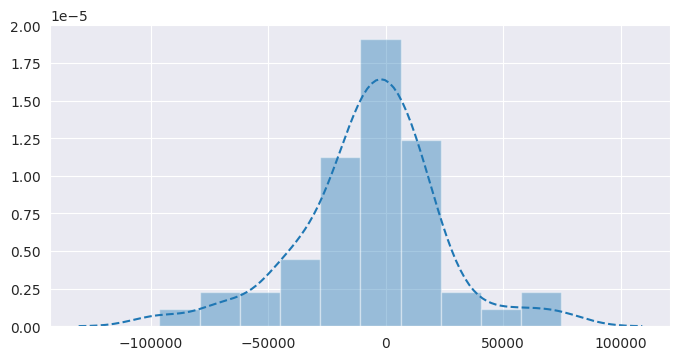

In [642]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4),dpi=100)  
sns.distplot(stress_loss,hist=True, kde=True, rug=False,norm_hist = True,
kde_kws={'linestyle':'--'}, 
label='stress loss')

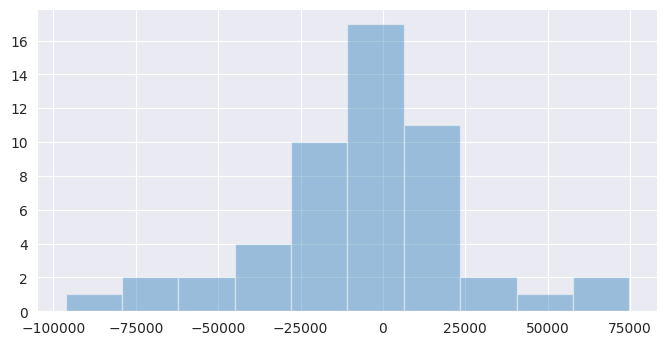

In [643]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4),dpi=100)  
sns.distplot(stress_loss, bins=10,hist=True, kde=False, rug=False,norm_hist = False,
kde_kws={'linestyle':'--'}, 
label='stress loss')

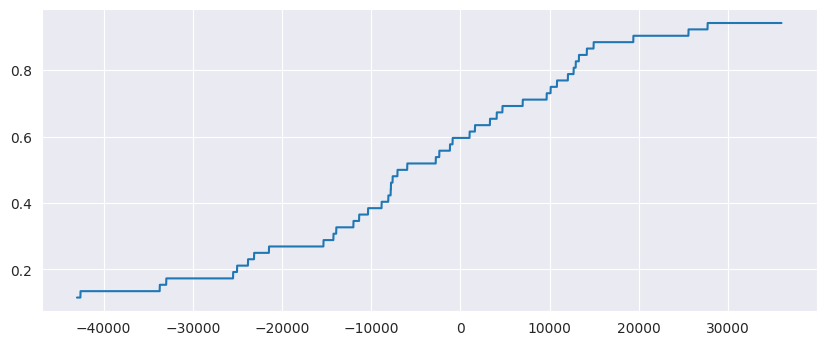

In [644]:

plt.figure(figsize=(10,4),dpi=100) 
length=len(stress_loss)
x=np.linspace(-43000,36000,8000)
y=[]
for i in range(8000):
  m=x[i]
  function=[0]*(length+1)
  if m<stress_loss[0]:
    function[0]=0
  if m>=stress_loss[(length-1)]:
    function[length]=1
  for j in range((length-1)):
    if m>=stress_loss[j] and m<stress_loss[j+1]:
      function[j+1]=(1+j)/length
  b=0
  for n in range((length+1)):
    b+=function[n]
  y.append(b)
plt.plot(x,y)

In [645]:
52*0.99

51.48

In [646]:
52*0.95

49.4

 **SVAR0.99=74752.85**

 **SVAR0.95=44084.48**

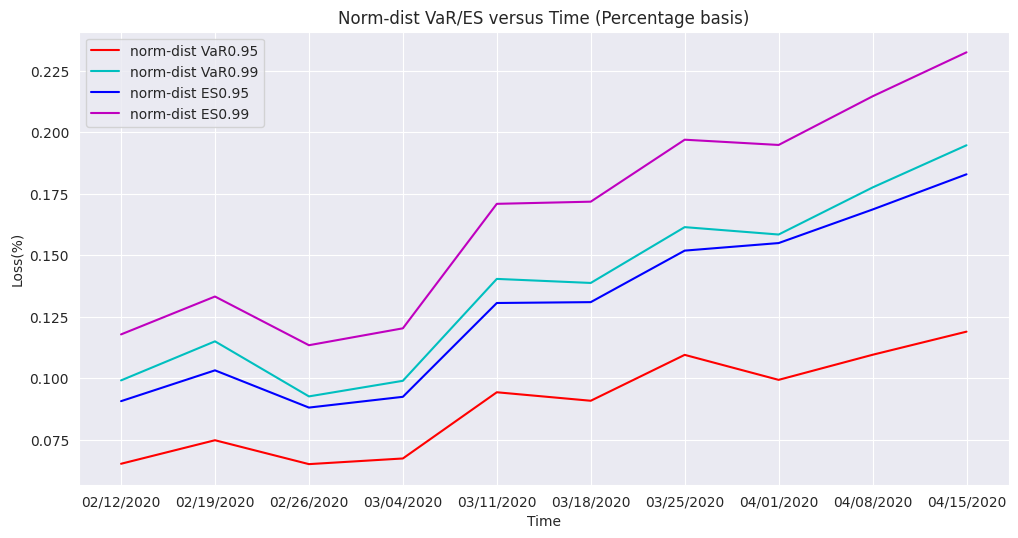

In [740]:
normp_var95=[]
normp_var99=[]
normp_es95=[]
normp_es99=[]
tp_var95=[]
tp_var99=[]
tp_es95=[]
tp_es99=[]
for i in range(10):
  nv95=portfolio_var95[i]/port_value[i]
  nv99=portfolio_var99[i]/port_value[i]
  ne95=portfolio_es95[i]/port_value[i]
  ne99=portfolio_es99[i]/port_value[i]
  tv95=t_var95[i]/port_value[i]
  tv99=t_var99[i]/port_value[i]
  te95=t_es95[i]/port_value[i]
  te99=t_es99[i]/port_value[i]
  normp_var95.append(nv95)
  normp_var99.append(nv99)
  normp_es95.append(ne95)
  normp_es99.append(ne99)
  tp_var95.append(tv95)
  tp_var99.append(tv99)
  tp_es95.append(te95)
  tp_es99.append(te99)

import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
sns.set_style("darkgrid")
plt.figure(figsize=(12,6),dpi=100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(WE))
plt.plot(index_list111,normp_var95,'r', label='norm-dist VaR0.95')
plt.plot(index_list111,normp_var99,'c', label='norm-dist VaR0.99')
plt.plot(index_list111,normp_es95,'b', label='norm-dist ES0.95')
plt.plot(index_list111,normp_es99,'m', label='norm-dist ES0.99')

#plt.xticks(index_list)
plt.title('Norm-dist VaR/ES versus Time (Percentage basis)')
plt.ylabel('Loss(%)')
plt.xlabel('Time')
plt.legend()

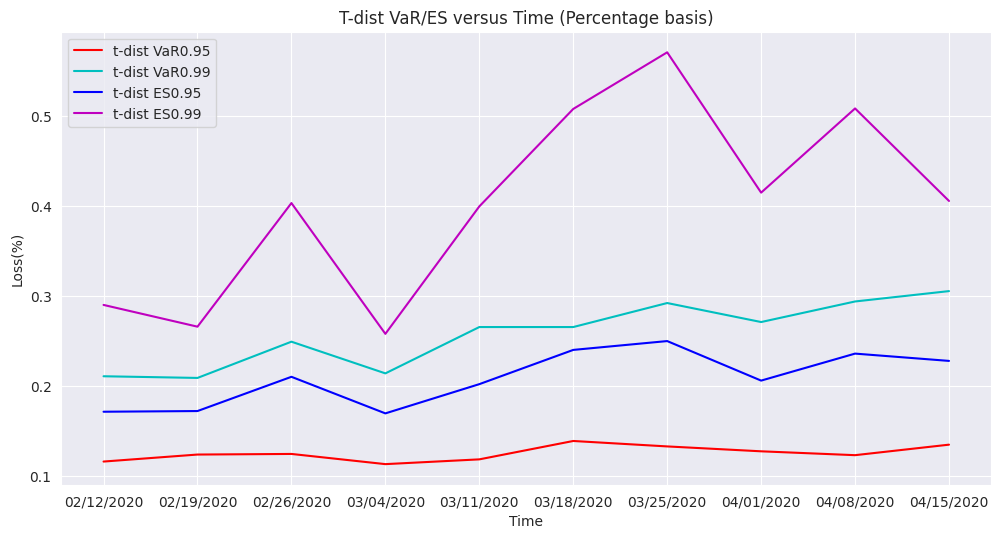

In [741]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6),dpi=100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(WE))
plt.plot(index_list111,tp_var95,'r', label='t-dist VaR0.95')
plt.plot(index_list111,tp_var99,'c', label='t-dist VaR0.99')
plt.plot(index_list111,tp_es95,'b', label='t-dist ES0.95')
plt.plot(index_list111,tp_es99,'m', label='t-dist ES0.99')

#plt.xticks(index_list)
plt.title('T-dist VaR/ES versus Time (Percentage basis)')
plt.ylabel('Loss(%)')
plt.xlabel('Time')
plt.legend()

In [742]:
tp_es95

[0.17140344245948166,
 0.17216390254486638,
 0.21018238194313854,
 0.16956971992335843,
 0.2020259393396252,
 0.24004715508382327,
 0.24986428404177236,
 0.20596794930824652,
 0.2359394894332599,
 0.22784219456884772]

In [743]:
tp_es99

[0.28999122018778095,
 0.2658428374931126,
 0.40309578309773064,
 0.25788093727876715,
 0.3993667029830404,
 0.5075945300647662,
 0.5704684259857306,
 0.41466872581012626,
 0.508139389948433,
 0.40541868290159605]

In [744]:
tp_var95

[0.1160822298277405,
 0.1238654187426187,
 0.12454010648148535,
 0.11322529106035781,
 0.11851733170088914,
 0.13893072552718944,
 0.13288988404087673,
 0.1274601404235036,
 0.12317211734040129,
 0.1348412824273591]

In [745]:
tp_var99

[0.21079378225009457,
 0.2089349333318747,
 0.24917369509548898,
 0.21398965539804465,
 0.265429656213354,
 0.265426356866659,
 0.2920984085168652,
 0.27099158090460956,
 0.29382318181027534,
 0.3053377601401906]

In [746]:
normp_var95

[0.06518002346675425,
 0.07474659890853061,
 0.06503134198540364,
 0.06733144381880049,
 0.09424289127895236,
 0.09079232865904377,
 0.10944695540254559,
 0.0992850764420733,
 0.1094803634033526,
 0.11888376095927322]

In [747]:
normp_es99

[0.11776456569714099,
 0.1331606062941028,
 0.11336775193633587,
 0.12023675061235368,
 0.17083604543667297,
 0.17171330904458254,
 0.19690634483420377,
 0.19476716149185463,
 0.21454035803226162,
 0.23242681608250554]

In [748]:
normp_var99

[0.09907054481713032,
 0.11494532029066144,
 0.09256296354129903,
 0.09890510590065146,
 0.14032239764447585,
 0.1386787769520108,
 0.16136512479313436,
 0.15836223646490927,
 0.1774916956138351,
 0.194642349094468]

In [749]:
normp_es95

[0.09062656343309983,
 0.10315438985772689,
 0.08801850586108273,
 0.09239430247362394,
 0.1305304225143345,
 0.13087967929622263,
 0.15181956657849985,
 0.15488885777527017,
 0.16852894412639982,
 0.18284254060173574]

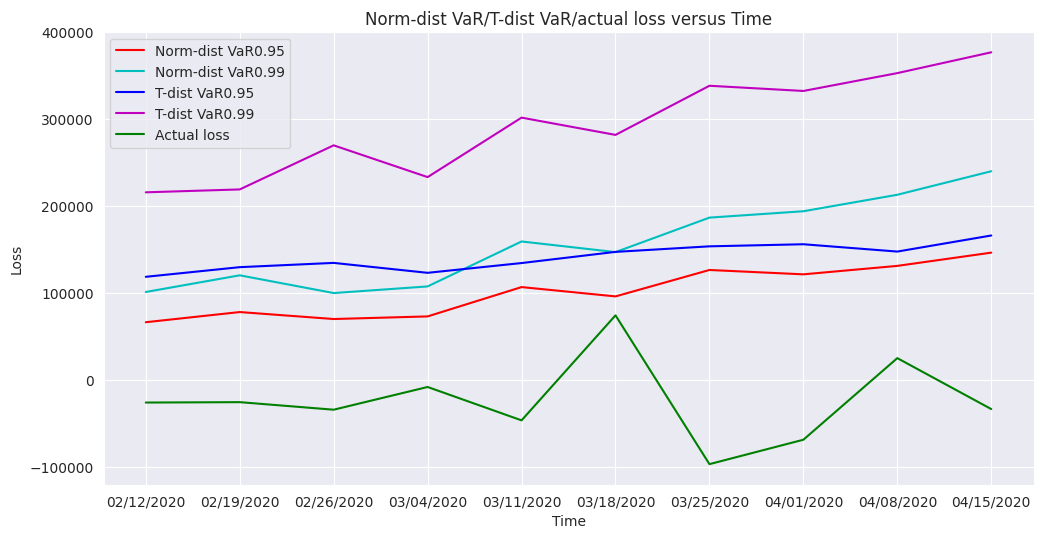

In [820]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6),dpi=100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(WE))
plt.plot(index_list111,portfolio_var95,'r', label='Norm-dist VaR0.95')
plt.plot(index_list111,portfolio_var99,'c', label='Norm-dist VaR0.99')
plt.plot(index_list111,t_var95,'b', label='T-dist VaR0.95')
plt.plot(index_list111,t_var99,'m', label='T-dist VaR0.99')
plt.plot(index_list111,actual_loss2020,'g', label='Actual loss')
plt.title('Norm-dist VaR/T-dist VaR/actual loss versus Time')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend()

# **Compare all three conditions above and give your own conclusion.**